# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres (или используйте `*.csv` как есть).
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [ ]:
import pandas as pd
import os

In [ ]:
!git clone https://github.com/aiedu-courses/linear_models.git

Cloning into 'linear_models'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 9), reused 16 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 761.61 KiB | 6.35 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
files_dir = r'/content/linear_models/datasets/clients'
files = os.listdir(files_dir)
df_dict = {}
for i,file in enumerate(files):
  key = f"df_{file.split('.')[0]}"
  df_dict[key] = pd.read_csv(os.path.join(files_dir, file))


In [ ]:
records = []
for df_ in df_dict.keys():
  df_name = "_".join(df_.split("_")[1:])
  df = df_dict[df_]
  n_rows, n_cols = df.shape
  n_dup = df.duplicated().sum()
  n_missing = df.isna().sum().sum()
  fill_pct = ((1 - df.isna().mean()) * 100).mean()

  records.append(
      {'table': df_name,
      'rows': n_rows,
      'columns': n_cols,
      'duplicates': n_dup,
      'missing': n_missing,
      'fill_pct_mean': fill_pct}
  )

info_of_all_df = pd.DataFrame(records).set_index('table')

In [ ]:
info_of_all_df

,rows,columns,duplicates,missing,fill_pct_mean
table,,,,,
D_work,3,3,0,0,100.00000
D_job,15223,5,0,5469,92.81482
D_last_credit,15223,4,0,0,100.00000
D_pens,2,3,0,0,100.00000
D_loan,21126,2,0,0,100.00000
D_salary,15523,3,300,0,100.00000
D_clients,16000,14,0,0,100.00000
D_close_loan,21126,2,0,0,100.00000
D_target,15223,3,0,0,100.00000


In [ ]:
base_data = df_dict['df_D_target']

In [ ]:
df_dict.keys()

dict_keys(['df_D_work', 'df_D_job', 'df_D_last_credit', 'df_D_pens', 'df_D_loan', 'df_D_salary', 'df_D_clients', 'df_D_close_loan', 'df_D_target'])

In [ ]:
data = base_data.merge(df_dict['df_D_clients'], left_on='ID_CLIENT', right_on='ID', how='left').merge(df_dict['df_D_job'], left_on='ID_CLIENT', right_on='ID_CLIENT', how='left').merge(df_dict['df_D_salary'], left_on='ID_CLIENT', right_on='ID_CLIENT', how='left')

In [ ]:
data = data.drop('ID', axis = 1)

In [ ]:
data.to_csv('total_data.csv')

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from matplotlib.cbook import boxplot_stats
from matplotlib.colors import ListedColormap
from scipy import stats

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_theme(
    style='whitegrid',
    font_scale=1.2
)
cmap = ListedColormap(['skyblue', 'salmon'])

In [ ]:
plt.rcParams.update({
    "axes.titlesize":   14,
    "axes.titleweight": "bold",
    "axes.labelsize":   12,
    "xtick.labelsize":  10,
    "ytick.labelsize":  10,
    "axes.prop_cycle":  plt.cycler("color", ["skyblue"]),  # default line/bar color
    "figure.constrained_layout.use": True,
})

# 1. Первичный просмотр

In [ ]:
print(f'The full data has {data.shape[0]} rows and {data.shape[1]} columns')

The full data has 15523 rows and 22 columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGREEMENT_RK             15523 non-null  int64  
 1   ID_CLIENT                15523 non-null  int64  
 2   TARGET                   15523 non-null  int64  
 3   AGE                      15523 non-null  int64  
 4   GENDER                   15523 non-null  int64  
 5   EDUCATION                15523 non-null  object 
 6   MARITAL_STATUS           15523 non-null  object 
 7   CHILD_TOTAL              15523 non-null  int64  
 8   DEPENDANTS               15523 non-null  int64  
 9   SOCSTATUS_WORK_FL        15523 non-null  int64  
 10  SOCSTATUS_PENS_FL        15523 non-null  int64  
 11  REG_ADDRESS_PROVINCE     15523 non-null  object 
 12  FACT_ADDRESS_PROVINCE    15523 non-null  object 
 13  POSTAL_ADDRESS_PROVINCE  15523 non-null  object 
 14  FL_PRESENCE_FL        

In [ ]:
data.isnull().sum()

,0
AGREEMENT_RK,0
ID_CLIENT,0
TARGET,0
AGE,0
GENDER,0
EDUCATION,0
MARITAL_STATUS,0
CHILD_TOTAL,0
DEPENDANTS,0
SOCSTATUS_WORK_FL,0


# Вывод по первичному анализу
1. Размер датасета 15 523 строки и 22 колонки
2. Большинство признаков имеют числовой тип данных, но некоторые относятся к категориальным (например пол), это будет рассмотрено далее
3. В данных имеются пропуски, которые будут рассмотрены более детально ниже

# 2. Работа с типами данных

In [ ]:
data = data.drop(['AGREEMENT_RK', 'ID_CLIENT'], axis = 1)

In [ ]:
obj_columns = list(data.columns[data.dtypes == 'object'])
num_columns = list(data.columns[data.dtypes != 'object'])

In [ ]:
for col in num_columns:
  print(f'For {col} there is {len(data[col].unique())} unique values')

For TARGET there is 2 unique values
For AGE there is 47 unique values
For GENDER there is 2 unique values
For CHILD_TOTAL there is 10 unique values
For DEPENDANTS there is 8 unique values
For SOCSTATUS_WORK_FL there is 2 unique values
For SOCSTATUS_PENS_FL there is 2 unique values
For FL_PRESENCE_FL there is 2 unique values
For OWN_AUTO there is 3 unique values
For WORK_TIME there is 303 unique values
For PERSONAL_INCOME there is 274 unique values


In [ ]:
data.describe()

,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,WORK_TIME,PERSONAL_INCOME
count,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,1.412500e+04,15523.000000
mean,0.119371,40.400438,0.653997,1.098886,0.644850,0.909360,0.134639,0.309798,0.116279,2.882264e+02,13848.041638
std,0.324235,11.607242,0.475709,0.996748,0.812663,0.287105,0.341348,0.462425,0.320771,2.413085e+04,8998.618992
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,24.000000
25%,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.400000e+01,8000.000000
50%,0.000000,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.800000e+01,12000.000000
75%,0.000000,50.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.100000e+02,17000.000000
max,1.000000,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.867959e+06,250000.000000


In [ ]:
data.describe(include = 'object')

,EDUCATION,MARITAL_STATUS,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,FAMILY_INCOME
count,15523,15523,15523,15523,15523,14126,14126,14126,15523
unique,7,5,81,81,80,31,12,10,5
top,Среднее специальное,Состою в браке,Краснодарский край,Краснодарский край,Краснодарский край,Торговля,Специалист,Участие в основ. деятельности,от 10000 до 20000 руб.
freq,6662,9601,688,688,688,2424,7143,11678,7218


# Выводы:
1. Данные можно разделить на 3 группы: непрерывные числовые признаки, порядковые категориальные признаки и категориальные признаки.
2. Некоторые категориальные признаки уже закодированы (пол, таргет и тд) и относятся к числовым. Всего в датасете 11 числовых признаков (в том числе таргет) и 9 категориальных

# Пропущенные значения

In [ ]:
data.isnull().sum().sort_values(ascending = False)

,0
WORK_TIME,1398
JOB_DIR,1397
GEN_INDUSTRY,1397
GEN_TITLE,1397
EDUCATION,0
GENDER,0
AGE,0
TARGET,0
MARITAL_STATUS,0
CHILD_TOTAL,0


In [ ]:
#Процентное соотношение пропущенных значений
round(data.isnull().mean()*100, 2).sort_values(ascending = False)

,0
WORK_TIME,9.01
JOB_DIR,9.00
GEN_INDUSTRY,9.00
GEN_TITLE,9.00
EDUCATION,0.00
GENDER,0.00
AGE,0.00
TARGET,0.00
MARITAL_STATUS,0.00
CHILD_TOTAL,0.00


In [ ]:
print('Общее число пропущенных значений: ', data.isnull().sum().sum())

Общее число пропущенных значений:  5589


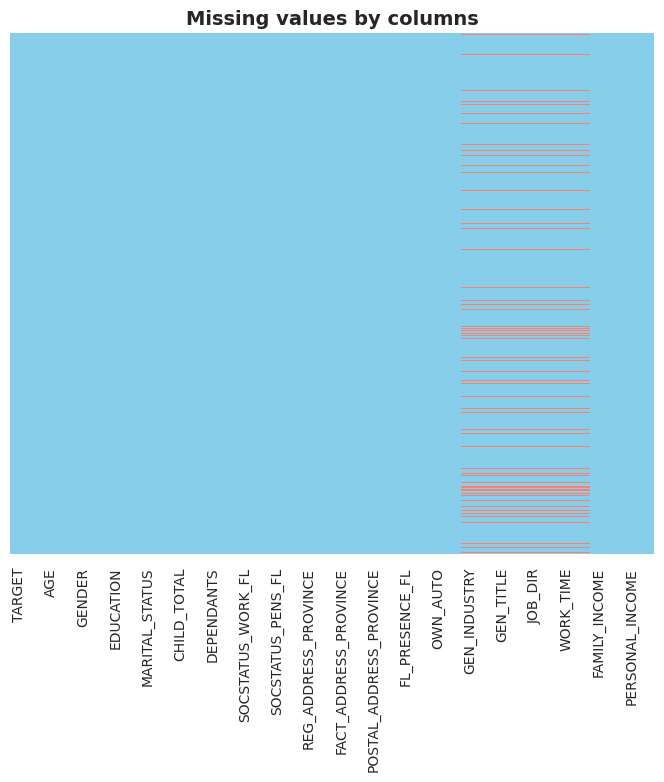

In [ ]:
#Построим график
plt.figure(figsize=(8, 10))
ax = sns.heatmap(
    data.isnull().astype(int),
    cmap=cmap,
    cbar = False,
    yticklabels = False,
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    ha='right',
    fontsize=10
)
ax.set_xlabel('')
ax.set_ylabel('')

plt.title('Missing values by columns', fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show()

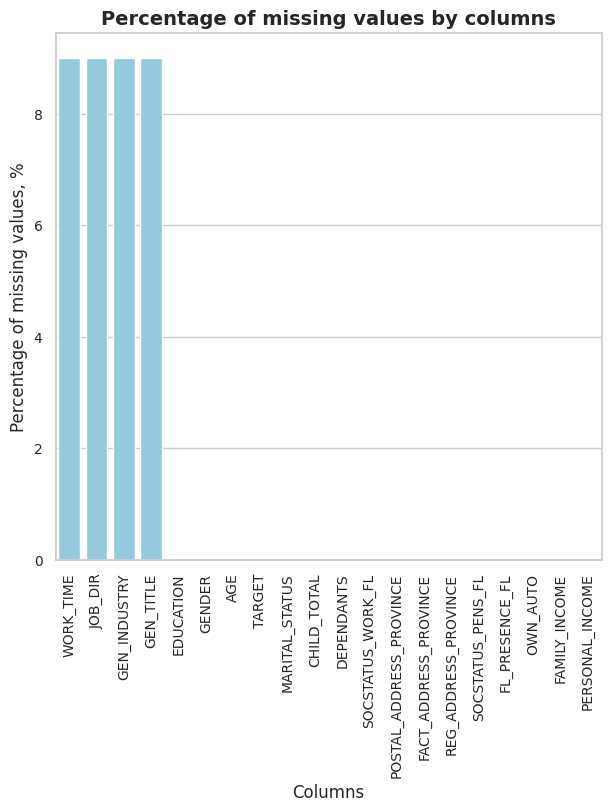

In [ ]:
plt.figure(figsize = (6, 8))
plt.title('Percentage of missing values by columns')
missing =(data.isnull().mean()*100).sort_values(ascending = False)
sns.barplot(x = missing.index, y=missing.values)
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values, %')
plt.xticks(rotation = 90, ha = 'center')
plt.show()

In [ ]:
missings = data.isnull().mean()
missing_cols = list(missings[missings > 0].index)
data[missing_cols].describe(include = 'object')

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR
count,14126,14126,14126
unique,31,12,10
top,Торговля,Специалист,Участие в основ. деятельности
freq,2424,7143,11678


In [ ]:
data.duplicated().sum()

np.int64(303)

In [ ]:
checking_df = {}
checking_df['Columns'] = data.shape[1]
checking_df['Rows'] = data.shape[0]
checking_df['Numerical columns'] = len(num_columns)
checking_df['Categorical columns'] = len(obj_columns)
checking_df['Missing values'] = round(data.isnull().sum().sum())
checking_df['Duplicates'] = round(data.duplicated().sum())
summary_df = pd.DataFrame(checking_df.values(), index = checking_df.keys(), columns = ['Value'])

In [ ]:
from google.colab import files

In [ ]:
# summary_df.to_csv('summary_df.csv', index=False)
# #files.download('summary_df.csv')

In [ ]:
summary_df

,Value
Columns,20
Rows,15523
Numerical columns,11
Categorical columns,9
Missing values,5589
Duplicates,303


## Вывод по анализу
1. Выявлено 4 столбца с пропусками. Это столбцы: GEN_INDUSTRY, GEN_TITLE, JOB_DIR, WORK_TIME.

  Судя по всему, пропуски приходятся на одни и те же 𝑛 объектов сразу в нескольких колонках — это значит, можно либо:

    - Удалить эти 𝑛 строк целиком (если их мало и они не критичны).
    - Либо разделить на две группы признаков и заполнить их разными методами (медианой/модой или категорией «Unknown»).

2. У вас есть значение ≈ 6 000 000 месяцев работы (≈ 500 000 лет) — oчевидный артефакт. Данное значение либо будет удаляться, либо будет замененно на Nan и заполнено медианным значением (или средним).
3. Найдено 303 полностью совпадающих строки.

In [ ]:
#Конечный датасет без дупликатов
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

np.int64(0)

# Визуализация данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15220 entries, 0 to 15522
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TARGET                   15220 non-null  int64  
 1   AGE                      15220 non-null  int64  
 2   GENDER                   15220 non-null  int64  
 3   EDUCATION                15220 non-null  object 
 4   MARITAL_STATUS           15220 non-null  object 
 5   CHILD_TOTAL              15220 non-null  int64  
 6   DEPENDANTS               15220 non-null  int64  
 7   SOCSTATUS_WORK_FL        15220 non-null  int64  
 8   SOCSTATUS_PENS_FL        15220 non-null  int64  
 9   REG_ADDRESS_PROVINCE     15220 non-null  object 
 10  FACT_ADDRESS_PROVINCE    15220 non-null  object 
 11  POSTAL_ADDRESS_PROVINCE  15220 non-null  object 
 12  FL_PRESENCE_FL           15220 non-null  int64  
 13  OWN_AUTO                 15220 non-null  int64  
 14  GEN_INDUSTRY             13

In [ ]:
#Времено удалим из числовых признаков категориальные числовые признаки
cols_to_del = ['TARGET', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'FL_PRESENCE_FL', 'OWN_AUTO']
only_num_cols = [col for col in num_columns if col not in cols_to_del]

In [ ]:
only_num_cols

['AGE', 'WORK_TIME', 'PERSONAL_INCOME']

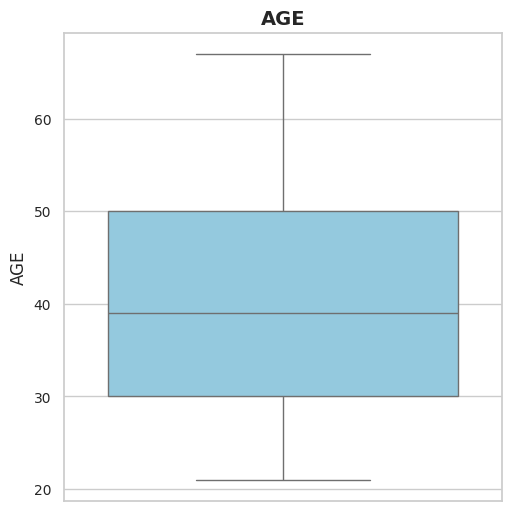

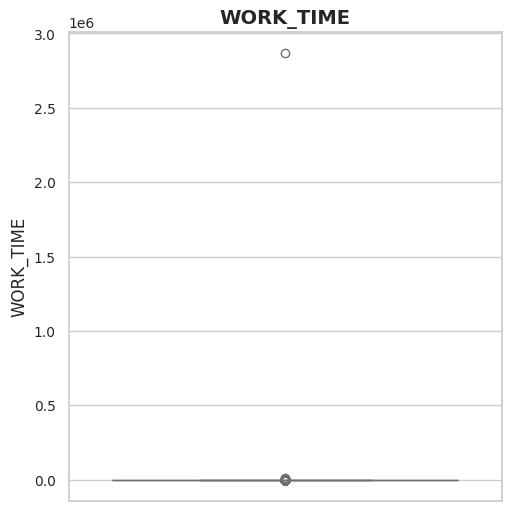

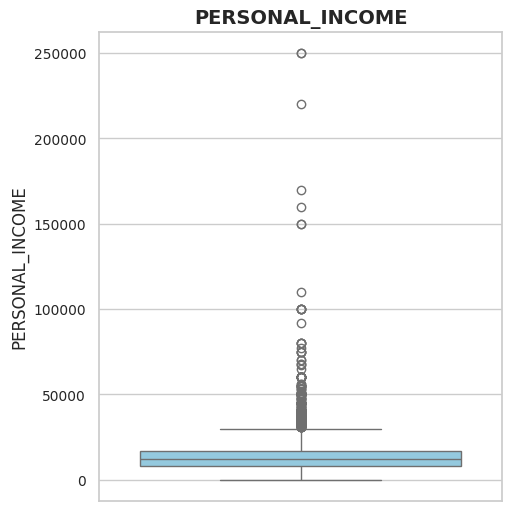

In [ ]:
for col in only_num_cols:
  fig, ax = plt.subplots(figsize = (5,5))
  sns.boxplot(y = data[col].dropna(), ax = ax,)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel(col)
  ax.tick_params(axis='y')
  fig.subplots_adjust(left = 0.2)
  plt.show()

# AGE

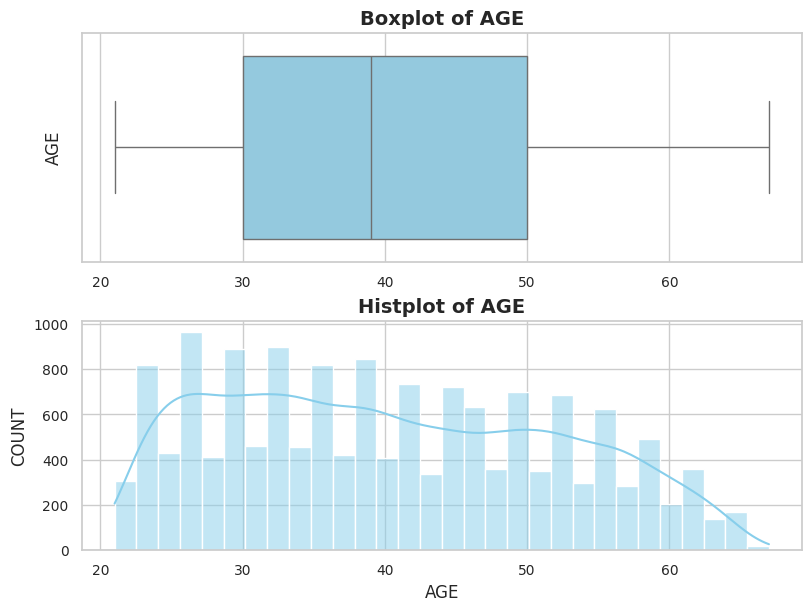

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (8, 6))
sns.boxplot(
    data['AGE'],
    orient = 'h',
    color = 'skyblue',
    ax = axes[0]
)
axes[0].set_title('Boxplot of AGE')
axes[0].set_xlabel('')
axes[0].set_ylabel('AGE')

sns.histplot(
    data['AGE'],
    kde = True,
    bins = 30,
    color = 'skyblue',
    ax = axes[1]
)
axes[1].set_title('Histplot of AGE')
axes[1].set_xlabel('AGE')
axes[1].set_ylabel('COUNT')
plt.show()

## WORK TIME EDA

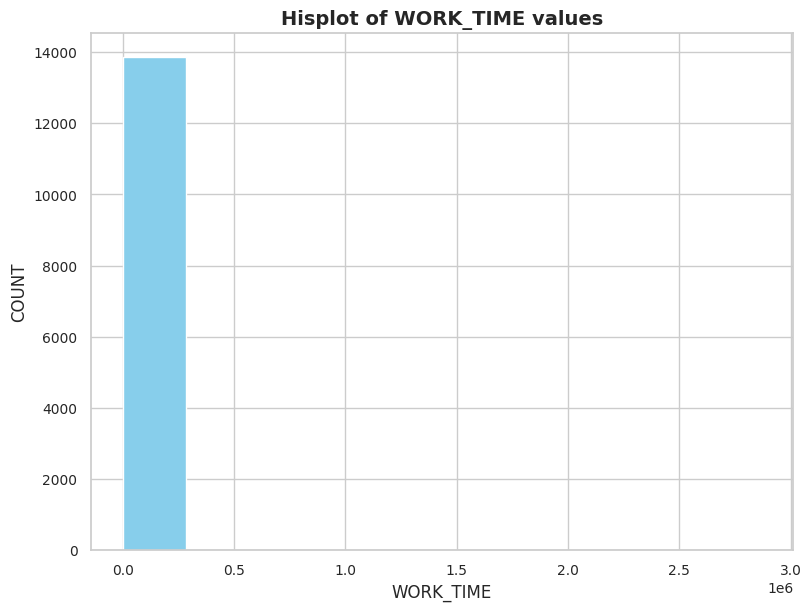

In [ ]:
plt.figure(figsize = (8,6))
plt.hist(data['WORK_TIME'])
plt.title('Hisplot of WORK_TIME values')
plt.xlabel('WORK_TIME')
plt.ylabel('COUNT')

plt.show()

In [ ]:
stats_ = boxplot_stats(data['WORK_TIME'].dropna(), whis=1.5)[0]
whishigh = stats_['whishi']
whishigh

np.float64(239.0)

In [ ]:
pct = pd.Series({
    'Above threshold': (data['WORK_TIME'] > whishigh).mean()*100,
    'Below threshold': (data['WORK_TIME'] <= whishigh).mean()*100
})
df_pct = pct.reset_index()
df_pct.columns = ['Category', 'Percentage']

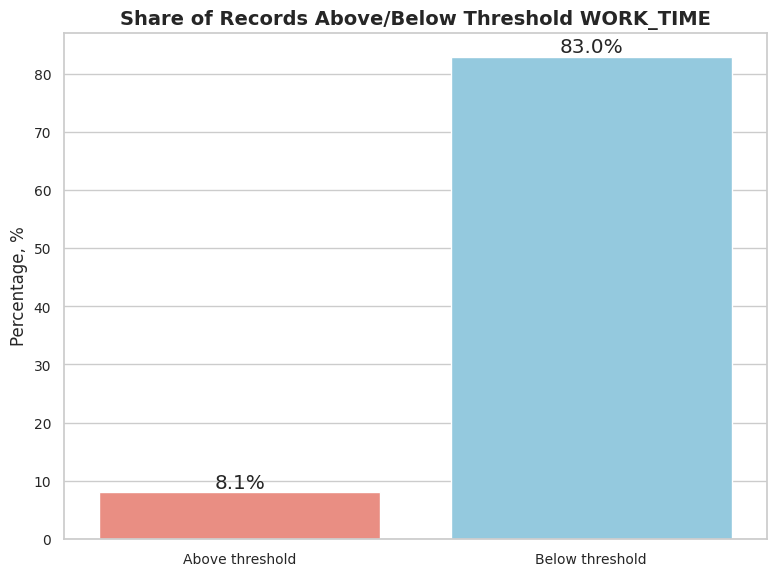

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(data = df_pct, x = 'Category', y = 'Percentage', palette=['salmon', 'skyblue'])
plt.title('Share of Records Above/Below Threshold WORK_TIME')
plt.xlabel('')
plt.ylabel('Percentage, %')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=0)

plt.tight_layout()
plt.show()

8% довольно высокий результат, немного сдвинем верхнюю границу и посмотрим на распределение

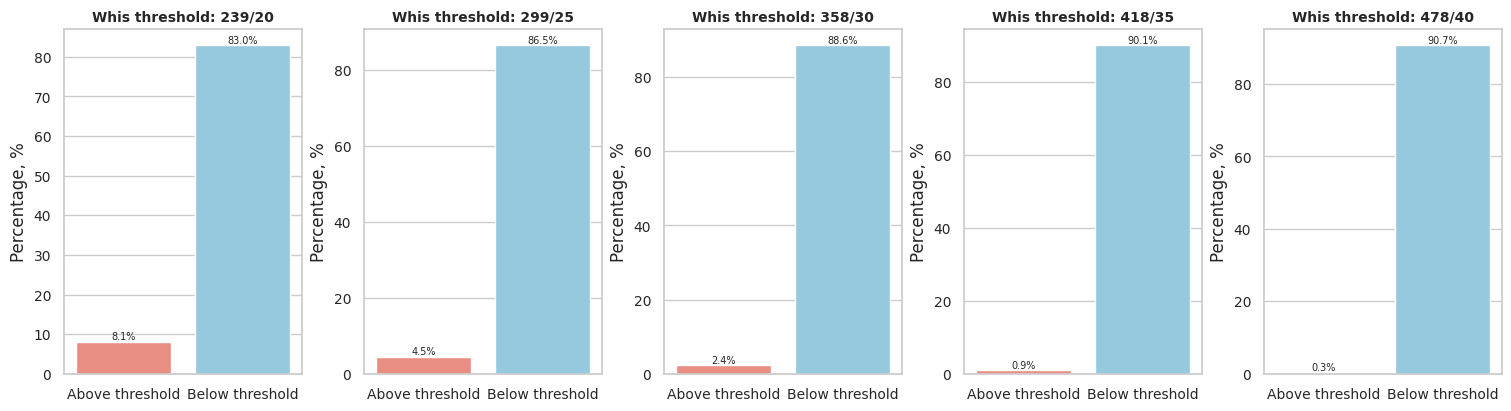

In [ ]:
thresholds = np.linspace(whishigh, whishigh * 2, num=5)
fig, axes = plt.subplots(1, 5, figsize=(15, 4), constrained_layout=True)

for whis, ax in zip(thresholds, axes):
  pct = pd.Series({
      'Above threshold': (data['WORK_TIME'] > whis).mean()*100,
      'Below threshold': (data['WORK_TIME'] <= whis).mean()*100
  })
  df_pct = pct.reset_index()
  df_pct.columns = ['Category', 'Percentage']
  sns.barplot(data = df_pct, x = 'Category', y = 'Percentage', palette=['salmon', 'skyblue'], ax=ax)
  ax.set_title(f'Whis threshold: {whis:.0f}/{whis/12:.0f}', fontsize = 10)
  for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=0, fontsize=7)
  ax.set_xlabel('')
  ax.set_ylabel('Percentage, %')

Стаж в возрасте 40 лет кажется реальным и кол-во объектов со стажем выше 40 лет составляет 0,3%, что не должно сильно повлиять на результат. Будем считать людей со стажем выше 40 лет - выбросами. Таким образом верхний порог будет составлять 478 месяцев/или 40 лет (это в 2 раза выше высчитанной границы)

In [ ]:
whishigh = 478

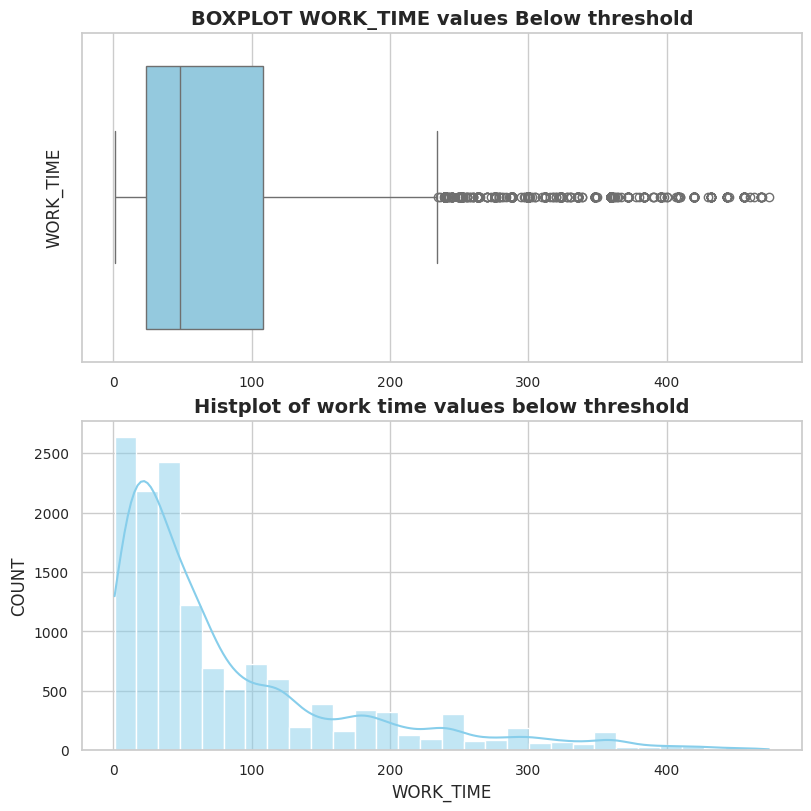

In [ ]:
alternative_work_time = data[data['WORK_TIME']<=whishigh]['WORK_TIME']
fig, axes = plt.subplots(2, 1, figsize = (8, 8), constrained_layout=True)
sns.boxplot(
    alternative_work_time.dropna(),
    color = 'skyblue',
    ax = axes[0],
    orient = 'h')
axes[0].set_ylabel('WORK_TIME')
axes[0].set_xlabel('')
axes[0].set_title('BOXPLOT WORK_TIME values Below threshold')

sns.histplot(
    data = alternative_work_time,
    bins = 30,
    kde = True,
    color = 'skyblue',
    ax = axes[1]
)

axes[1].set_title('Histplot of work time values below threshold')
axes[1].set_ylabel('COUNT')
axes[1].set_xlabel('WORK_TIME')


plt.show()

На гистограмме наблюдается длинный хвост, попробуем прологорифмировать данные и посмотрим на распределение

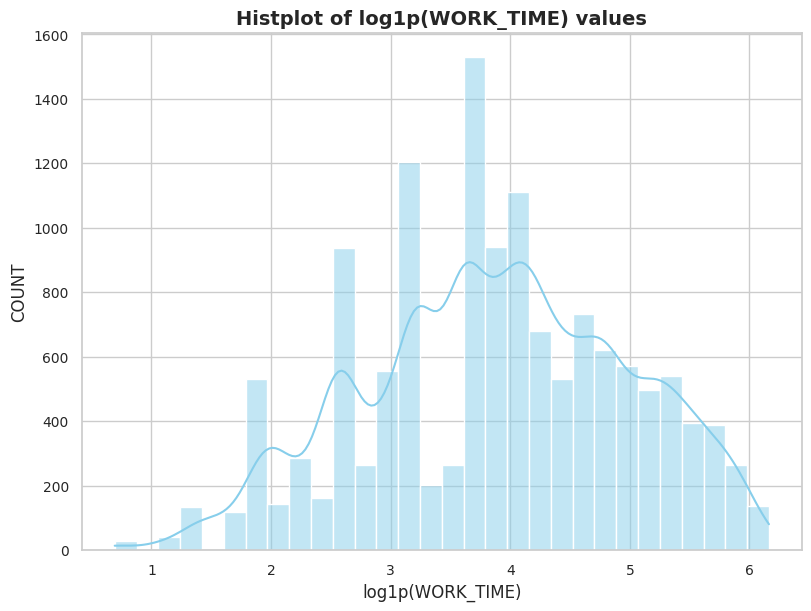

In [ ]:
log_work_time = np.log1p(alternative_work_time)
fig = plt.figure(figsize = (8, 6))
sns.histplot(
    log_work_time,
    kde = True,
    bins = 30,
    color = 'skyblue'
)
plt.title('Histplot of log1p(WORK_TIME) values')
plt.xlabel('log1p(WORK_TIME)')
plt.ylabel('COUNT')
plt.show()

После log1p гистограмма выглядит более симметрично и сглаженно.

In [ ]:
data = data[data['WORK_TIME']<= whishigh]

In [ ]:
data.shape

(13803, 20)

In [ ]:
data.isnull().sum()

,0
TARGET,0
AGE,0
GENDER,0
EDUCATION,0
MARITAL_STATUS,0
CHILD_TOTAL,0
DEPENDANTS,0
SOCSTATUS_WORK_FL,0
SOCSTATUS_PENS_FL,0
REG_ADDRESS_PROVINCE,0


Отсеив выбросы по признаку WORK_TIME, мы также убрали объекты с пропусками в других признаках

## PERSONAL INCOME EDA

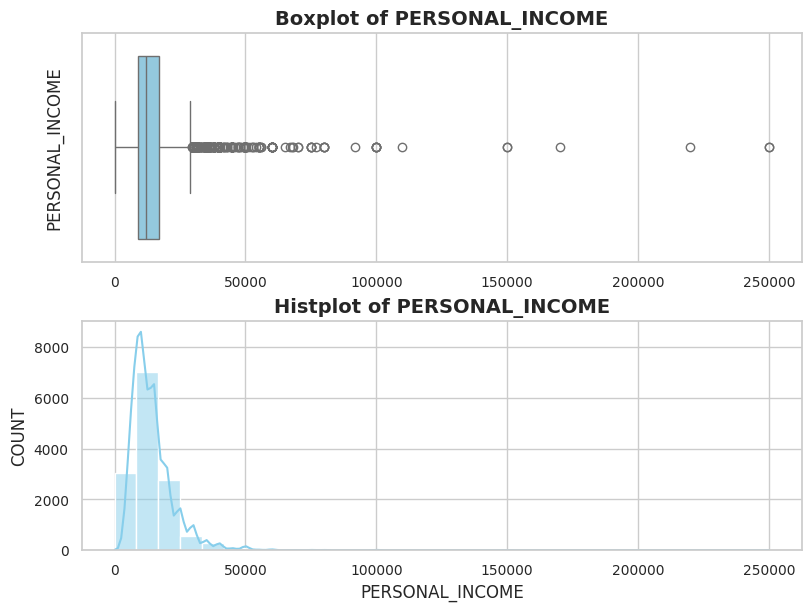

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (8, 6))
sns.boxplot(
    data['PERSONAL_INCOME'],
    orient = 'h',
    color = 'skyblue',
    ax = ax[0]
)
ax[0].set_title('Boxplot of PERSONAL_INCOME')
ax[0].set_xlabel('')
ax[0].set_ylabel('PERSONAL_INCOME')

sns.histplot(
    data['PERSONAL_INCOME'],
    kde = True,
    bins = 30,
    color = 'skyblue',
    ax = ax[1]
)
ax[1].set_title('Histplot of PERSONAL_INCOME')
ax[1].set_xlabel('PERSONAL_INCOME')
ax[1].set_ylabel('COUNT')
plt.show()

In [ ]:
stats_PI = boxplot_stats(data['PERSONAL_INCOME'].dropna(), whis=1.5)[0]
whishigh_PI = stats_PI['whishi']
whishigh_PI

np.float64(29000.0)

In [ ]:
pct_PI = pd.Series({
    'Above threshold': (data['PERSONAL_INCOME'] > whishigh_PI).mean()*100,
    'Below threshold': (data['PERSONAL_INCOME'] <= whishigh_PI).mean()*100
})
df_pct_PI = pct_PI.reset_index()
df_pct_PI.columns = ['Category', 'Percentage']

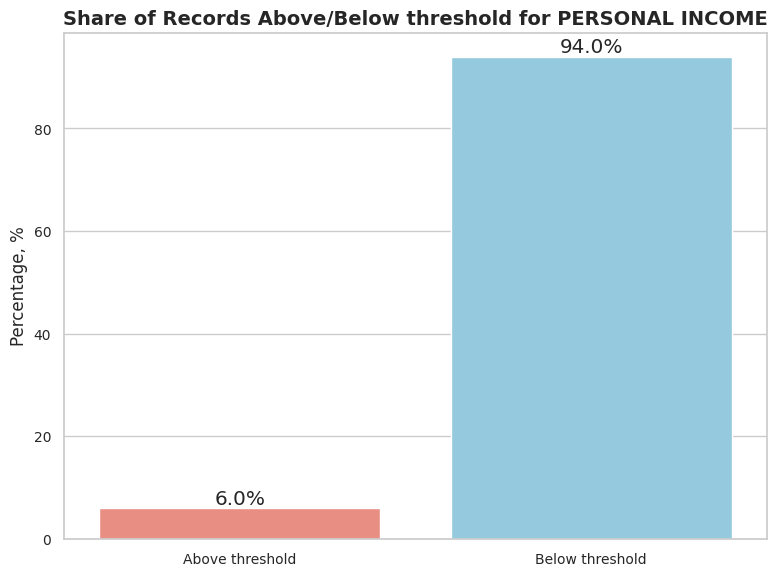

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = df_pct_PI, x = 'Category', y = 'Percentage', palette = ['salmon', 'skyblue'])
plt.title('Share of Records Above/Below threshold for PERSONAL INCOME', fontsize = 14, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Percentage, %', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

for container in ax.containers:
  ax.bar_label(container, fmt='%.1f%%', padding = 0)

plt.tight_layout()
plt.show()

Выбор верхнего порога статистически (75% квартиль *1,5) отсеивает довольно большое значение данных (6%). Попробуем также подобрать порог, который привел бы значения к нормальному распределению и позволил бы сохранить больше данных для дальнейшей работы.

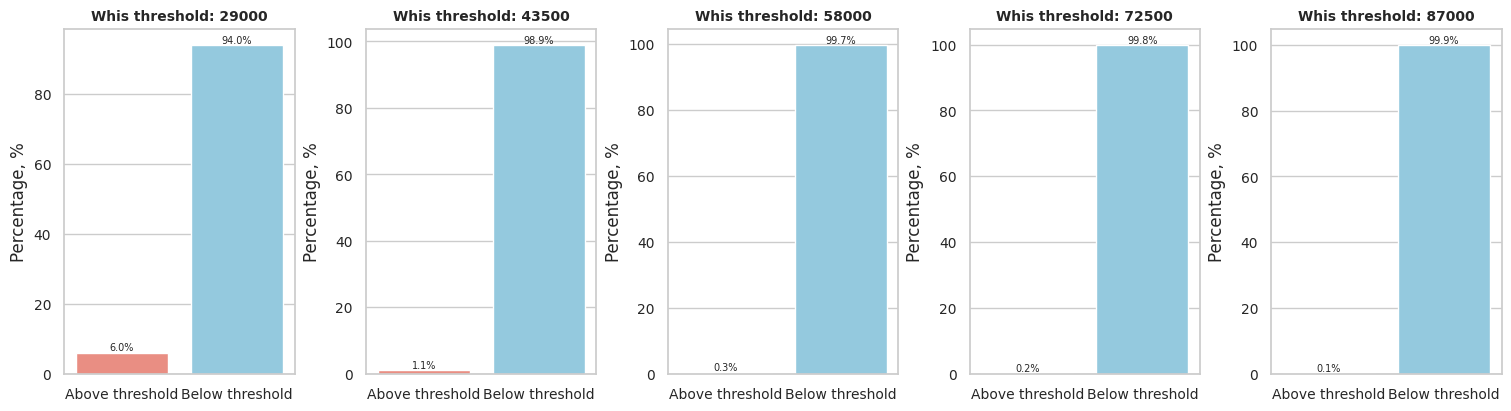

In [ ]:
thresholds = np.linspace(whishigh_PI, whishigh_PI * 3, num=5)
fig, axes = plt.subplots(1, 5, figsize=(15, 4), constrained_layout=True)

for whis, ax in zip(thresholds, axes):
  pct = pd.Series({
      'Above threshold': (data['PERSONAL_INCOME'] > whis).mean()*100,
      'Below threshold': (data['PERSONAL_INCOME'] <= whis).mean()*100
  })
  df_pct = pct.reset_index()
  df_pct.columns = ['Category', 'Percentage']
  sns.barplot(data = df_pct, x = 'Category', y = 'Percentage', palette=['salmon', 'skyblue'], ax=ax)
  ax.set_title(f'Whis threshold: {whis:.0f}', fontsize = 10)
  for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=0, fontsize=7)
  ax.set_xlabel('')
  ax.set_ylabel('Percentage, %')

Менее 0.1% людей имеют доход свыше 90 000 руб. При этом вполне себе реальный вариант, что некоторые клиенты имеют такой доход, поэтому эти данные сложно назвать "нереалистичными" как с предыдущим признаком. Попробуем также прологорифмировать данные и посмотреть на распределение

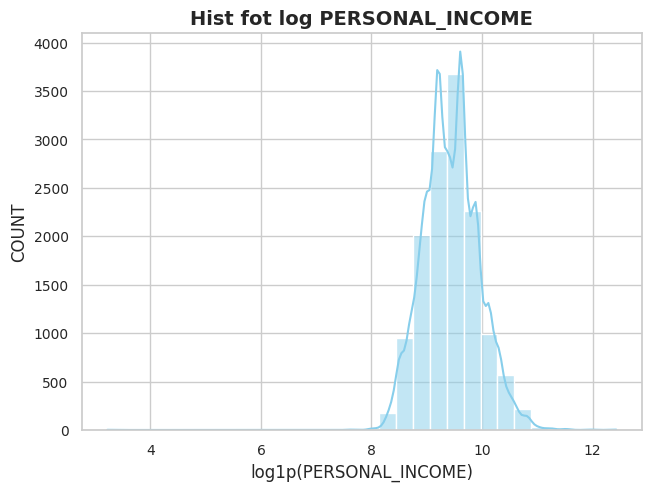

In [ ]:
log_per_income = np.log1p(data['PERSONAL_INCOME'])
sns.histplot(log_per_income, bins = 30, kde = True)
plt.title('Hist fot log PERSONAL_INCOME')
plt.xlabel('log1p(PERSONAL_INCOME)')
plt.ylabel('COUNT')
plt.show()

Логарифмирнование оправдано
– Оно «сжало» редкие большие доходы и выровняло распределение, что хорошо для линейных моделей и логистической регрессии.

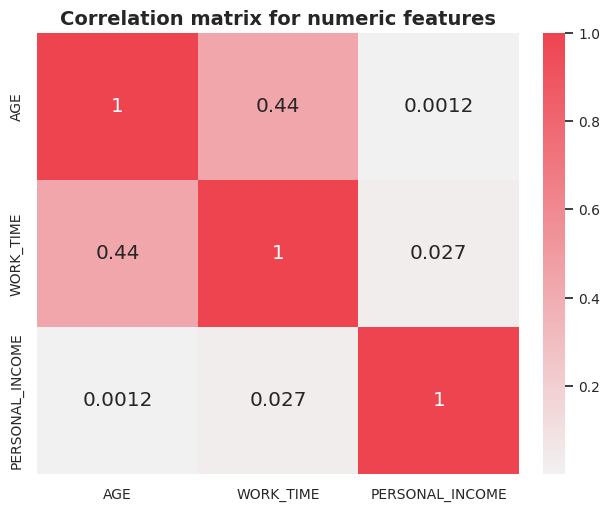

In [ ]:
cmap = sns.diverging_palette(
    h_neg=50, h_pos=10,
    s=80, l=55,
    as_cmap=True
)
corr = data[only_num_cols].dropna().corr()
plt.figure(figsize = (6, 5))
sns.heatmap(corr, annot = True, cmap = cmap, center = 0)
plt.title('Correlation matrix for numeric features')
plt.show()

## Анализ зависимости числовых признаков и таргета

In [ ]:
results = []

for col in ['WORK_TIME', 'AGE', 'PERSONAL_INCOME']:

  grp0 = data.loc[data['TARGET']==0, col]
  grp1 = data.loc[data['TARGET'] == 1, col]

  u_stat, p_u = stats.mannwhitneyu(grp0, grp1, alternative = 'two-sided')

  #Спирман
  rho, p_s = stats.spearmanr(data[col], data['TARGET'])

  results.append({
      'feature': col,
      'median_0': grp0.median(),
      'median_1': grp1.median(),
      'u_stat': u_stat,
      'p_mannwhitney': p_u,
      'spearman_rho': rho,
      'p_s': p_s
  })

res_num = pd.DataFrame(results)


In [ ]:
res_num

,feature,median_0,median_1,u_stat,p_mannwhitney,spearman_rho,p_s
0,WORK_TIME,48.0,36.0,12105543.0,2.939505e-22,-0.082588,2.510441e-22
1,AGE,38.0,35.0,11922682.5,1.557380e-17,-0.072546,1.418776e-17
2,PERSONAL_INCOME,12000.0,15000.0,9115663.0,2.416860e-21,0.080738,2.092862e-21


In [ ]:
total_res = []
for feature in res_num['feature']:
  total_res.append(
      {
          'feature': feature,
          'k_value': res_num.loc[res_num['feature'] == feature]['p_s'].values[0]
      }

   )

## Вывод по анализу числовых признаков

**WORK_TIME (стаж работы):**

Для начала как выбросы были взяты значения за пределами «усов» классического boxplot (1.5·IQR). Затем порог последовательно подбирался так, чтобы удалить минимальное число наблюдений.

В итоге был выбран порог 478 месяцев (≈40 лет), что покрывает 99,7 % реальных данных, и при этом устраняет технически нереалистичные значения.

После удаления «технических» выбросов объём выборки уменьшился с 15 220 до 13 803 строк (−9,3 %).

**PERSONAL_INCOME (личный доход):**

На исходных данных распределение сильно правосторонне: длинный «хвост» редких, но очень больших доходов.

Применение log1p(PERSONAL_INCOME) «сжало» хвост, сделало распределение почти симметричным и приближённым к нормальному.

Такое преобразование рекомендовано для линейных и логистических моделей, а также для алгоритмов, чувствительных к масштабу признака.

**Корреляция между числовыми признаками:**

Между AGE, WORK_TIME и PERSONAL_INCOME наблюдается крайне слабая корреляция (|r|<0,01).

Это означает, что каждый из трёх признаков вносит в модель свою уникальную информацию, и нет риска значительной мультиколлинеарности.

**Зависимость с таргетом:**
Наблюдается слабая зависимость между числовыми признаками и таргетом. Все числовые признаки ненормированны, поэтому для проверки статистически значимого различия в признаках был применен тест Мана-Уитни.



## Анализ категориальных признаков

In [ ]:
data.describe(include = 'object')

,EDUCATION,MARITAL_STATUS,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,FAMILY_INCOME
count,13803,13803,13803,13803,13803,13803,13803,13803,13803
unique,7,5,81,81,80,31,12,10,5
top,Среднее специальное,Состою в браке,Кемеровская область,Кемеровская область,Кемеровская область,Торговля,Специалист,Участие в основ. деятельности,от 10000 до 20000 руб.
freq,5916,8592,608,608,608,2381,6978,11405,6316


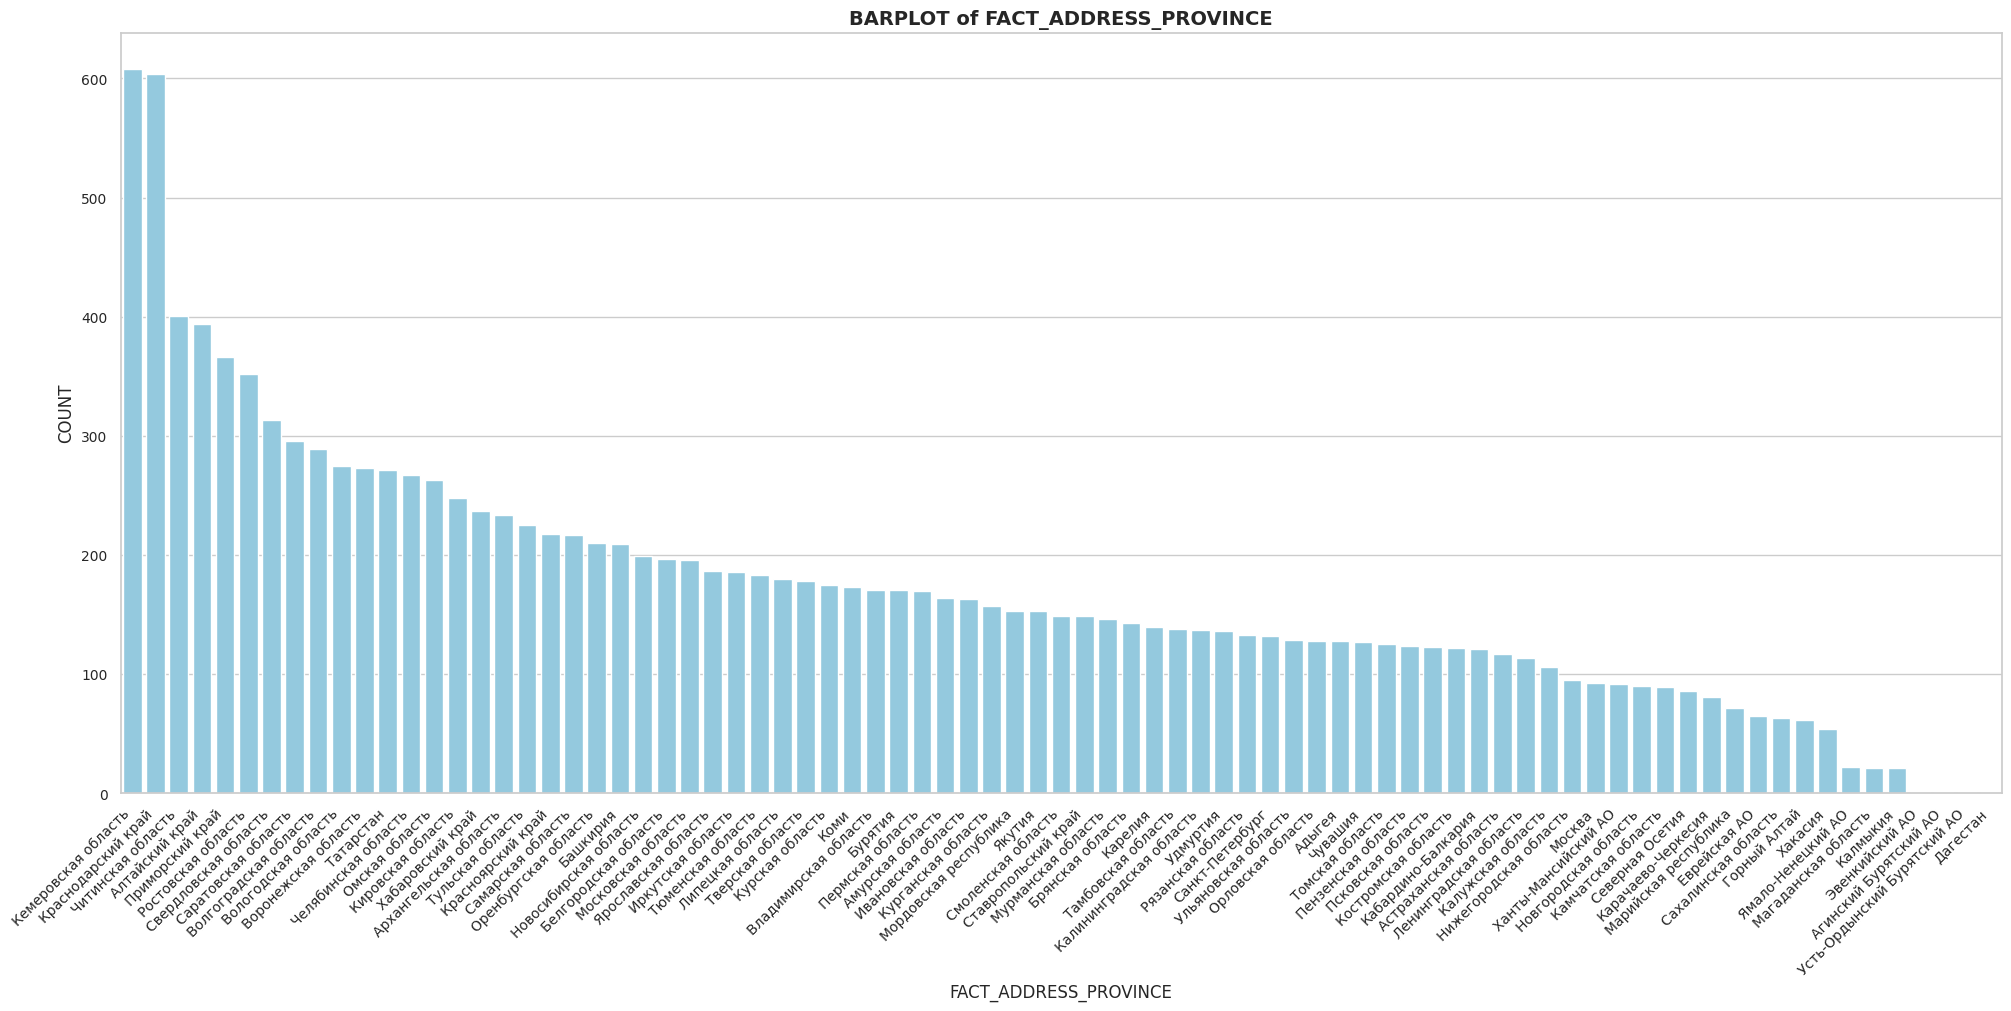

In [ ]:
regions_counts = data['FACT_ADDRESS_PROVINCE'].value_counts()
plt.figure(figsize=(20, 10))
sns.barplot(x = regions_counts.index, y = regions_counts.values)
plt.xlabel('FACT_ADDRESS_PROVINCE')
plt.ylabel('COUNT')
plt.xticks(rotation=45, ha='right')
plt.title('BARPLOT of FACT_ADDRESS_PROVINCE')
plt.show()

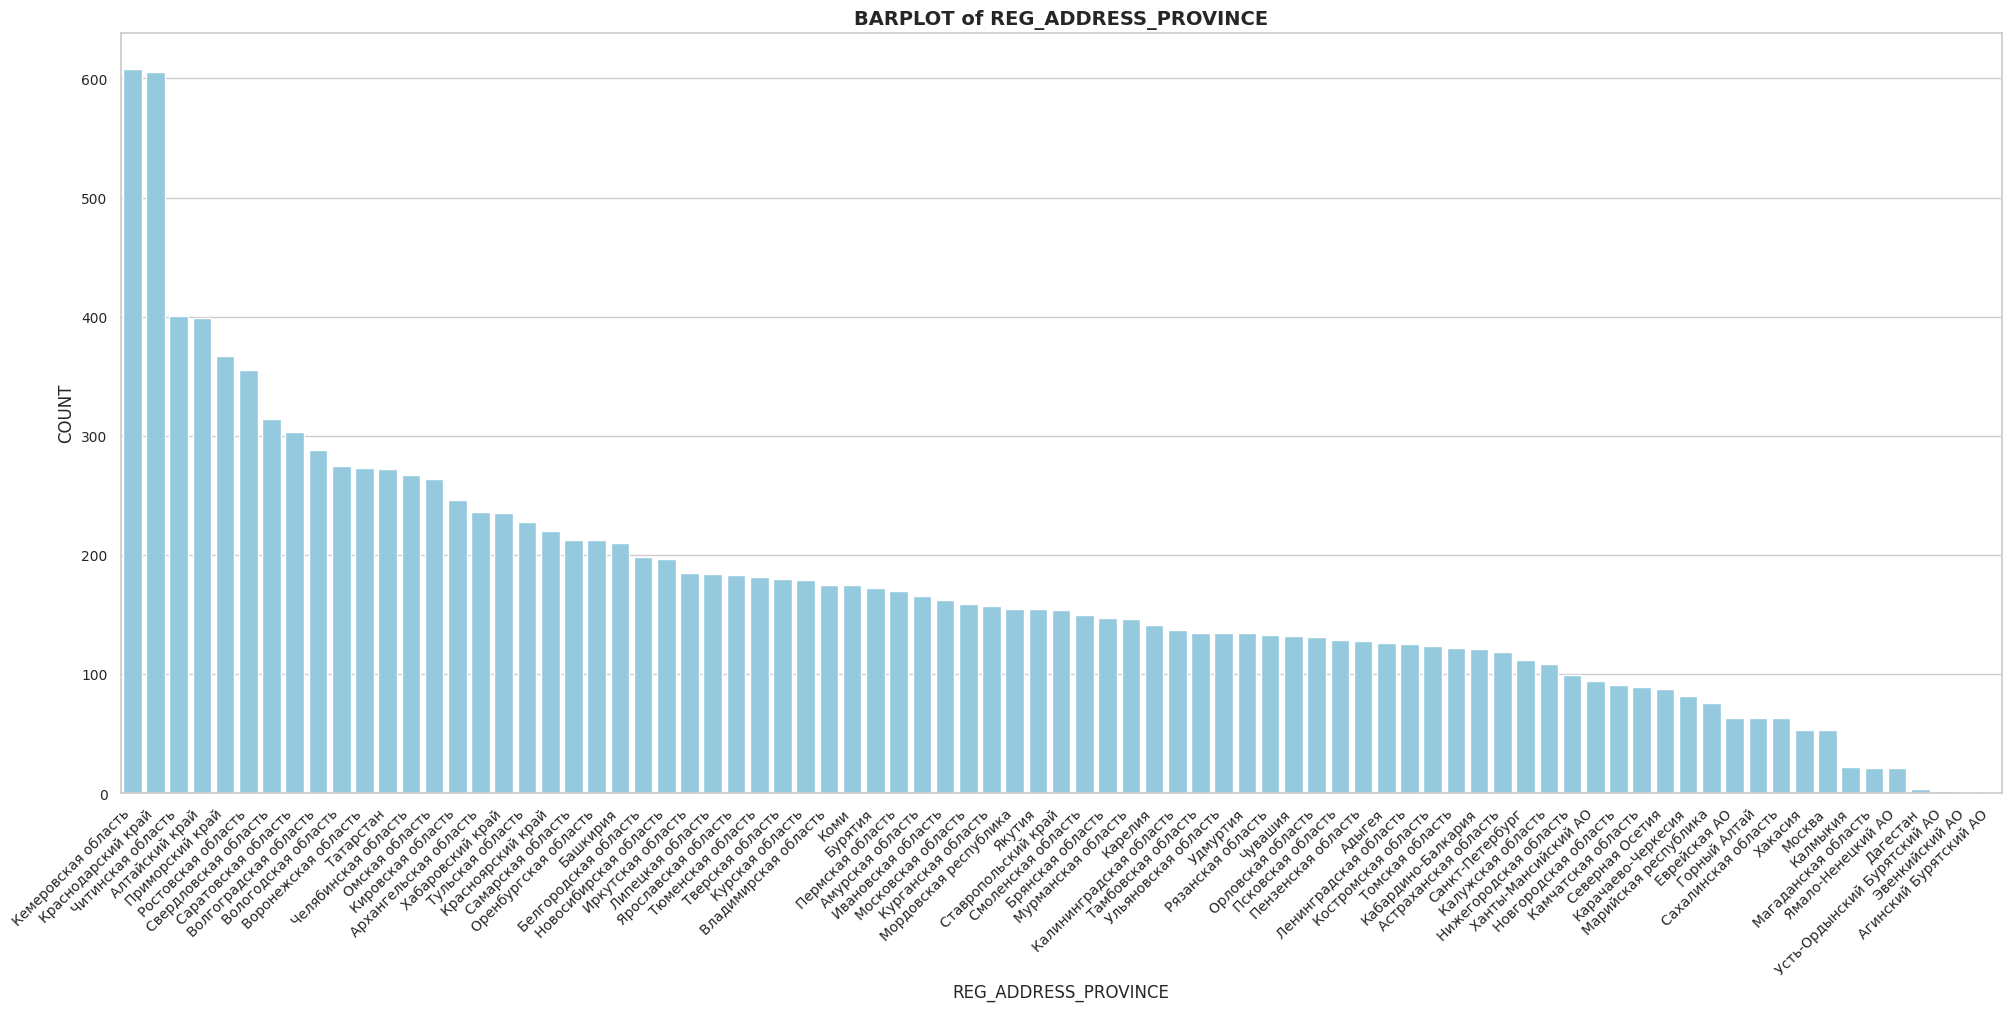

In [ ]:
regions_counts = data['REG_ADDRESS_PROVINCE'].value_counts()
plt.figure(figsize=(20, 10))
sns.barplot(x = regions_counts.index, y = regions_counts.values)
plt.xlabel('REG_ADDRESS_PROVINCE')
plt.ylabel('COUNT')
plt.xticks(rotation=45, ha='right')
plt.title('BARPLOT of REG_ADDRESS_PROVINCE')
plt.show()

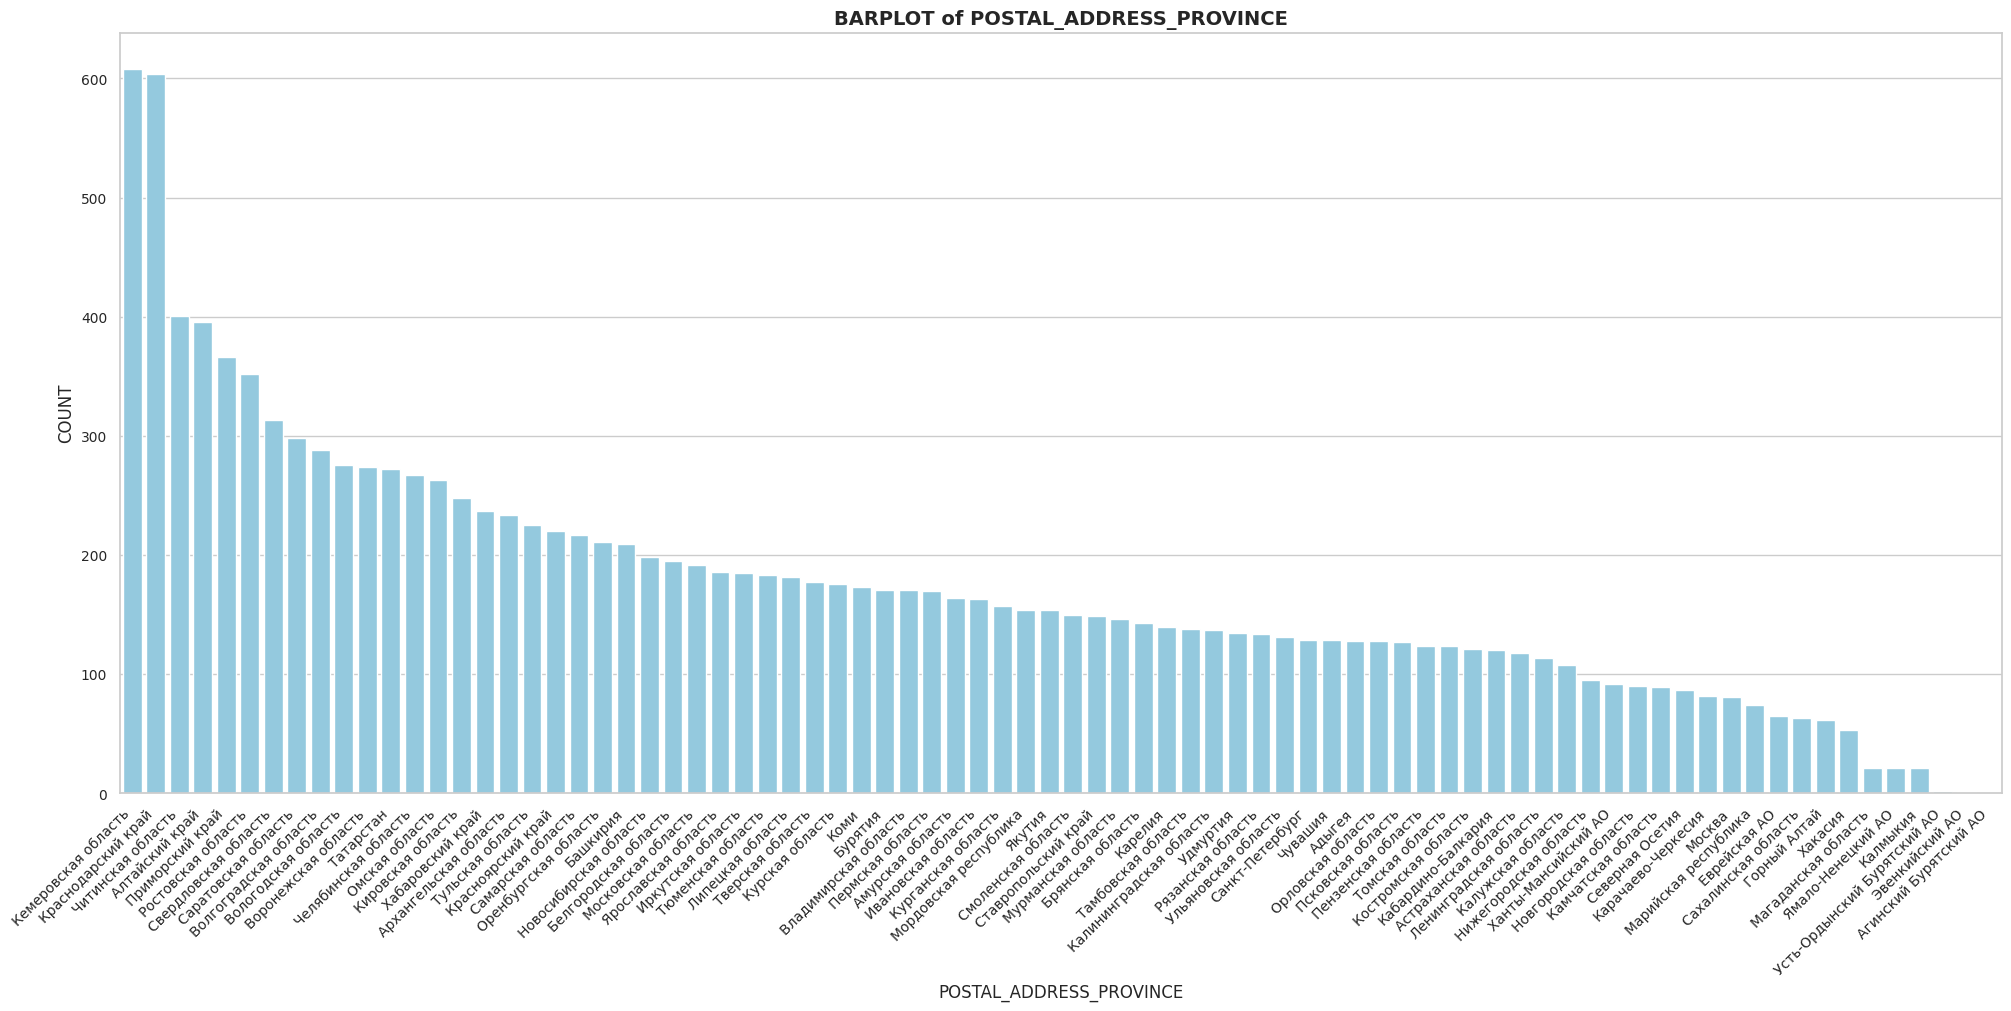

In [ ]:
regions_counts = data['POSTAL_ADDRESS_PROVINCE'].value_counts()
plt.figure(figsize=(20, 10))
sns.barplot(x = regions_counts.index, y = regions_counts.values)
plt.xlabel('POSTAL_ADDRESS_PROVINCE')
plt.ylabel('COUNT')
plt.xticks(rotation=45, ha='right')
plt.title('BARPLOT of POSTAL_ADDRESS_PROVINCE')
plt.show()

Сгруппируем области по федеральнам округам и снова посмотрим на распределение по значениям

In [ ]:
regions_counts

,count
POSTAL_ADDRESS_PROVINCE,
Кемеровская область,608
Краснодарский край,604
Читинская область,401
Алтайский край,396
Приморский край,366
...,...
Ямало-Ненецкий АО,21
Калмыкия,21
Усть-Ордынский Бурятский АО,2


In [ ]:
fed_okr = pd.read_csv('/content/federal_districts_mapping_ru.csv')

In [ ]:
map_dict = dict(zip(fed_okr['Регион'], fed_okr['Округ']))

In [ ]:
data['FACT_FO'] = data['FACT_ADDRESS_PROVINCE'].map(map_dict)

In [ ]:
data['FACT_FO'].value_counts()

,count
FACT_FO,
ЦФО,2957
СФО,1993
ЮФО,1362
ПФО,1319
СЗФО,1251
УФО,920
ДФО,687
СКФО,149


In [ ]:
data[['FACT_FO', 'FACT_ADDRESS_PROVINCE']]

,FACT_FO,FACT_ADDRESS_PROVINCE
0,ПФО,Оренбургская область
2,NaN,Кабардино-Балкария
3,СФО,Иркутская область
4,ЮФО,Ростовская область
5,NaN,Кабардино-Балкария
...,...,...
15517,ЦФО,Тамбовская область
15518,ЦФО,Воронежская область
15519,NaN,Башкирия
15520,ЦФО,Брянская область


In [ ]:
unmatched = data.loc[data['FACT_FO'].isna(), 'FACT_ADDRESS_PROVINCE'].unique()

In [ ]:
unmatched

array(['Кабардино-Балкария', 'Карелия', 'Еврейская АО',
       'Камчатская область', 'Адыгея', 'Амурская область', 'Башкирия',
       'Пермская область', 'Мордовская республика', 'Ханты-Мансийский АО',
       'Читинская область', 'Якутия', 'Коми', 'Татарстан', 'Чувашия',
       'Хакасия', 'Бурятия', 'Удмуртия', 'Карачаево-Черкесия',
       'Горный Алтай', 'Марийская республика', 'Ямало-Ненецкий АО',
       'Эвенкийский АО', 'Северная Осетия', 'Калмыкия',
       'Агинский Бурятский АО', 'Усть-Ордынский Бурятский АО', 'Дагестан'],
      dtype=object)

In [ ]:
manual_overrides = {
    "Кабардино-Балкария":          "СКФО",
    "Карелия":                     "СЗФО",
    "Еврейская АО":                "ДФО",
    "Камчатская область":          "ДФО",
    "Адыгея":                      "ЮФО",
    "Амурская область":            "ДФО",
    "Башкирия":                    "ПФО",
    "Пермская область":            "ПФО",
    "Мордовская республика":       "ПФО",
    "Ханты-Мансийский АО":         "УФО",
    "Читинская область":           "СФО",  # Забайкальский край
    "Татарстан":                   "ПФО",
    "Якутия":                      "ДФО",  # Республика Саха
    "Коми":                        "СЗФО",
    "Чувашия":                     "ПФО",
    "Хакасия":                     "СФО",
    "Бурятия":                     "СФО",
    "Удмуртия":                    "ПФО",
    "Карачаево-Черкесия":          "СКФО",
    "Горный Алтай":                "СФО",  # Республика Алтай
    "Марийская республика":        "ПФО",
    "Ямало-Ненецкий АО":           "УФО",
    "Агинский Бурятский АО":       "СФО",
    "Эвенкийский АО":              "СФО",
    "Усть-Ордынский Бурятский АО": "СФО",
    "Северная Осетия":             "СКФО",
    "Калмыкия":                    "ЮФО",
    "Дагестан":                    "ЮФО"
}

In [ ]:
full_map = {**map_dict, **manual_overrides}

In [ ]:
data['FACT_FO'] = data['FACT_ADDRESS_PROVINCE'].map(full_map)
data['POSTAL_FO'] = data['POSTAL_ADDRESS_PROVINCE'].map(full_map)
data['REG_FO'] = data['REG_ADDRESS_PROVINCE'].map(full_map)
print("Незаполненных округов для FACT_ADDRESS_PROVINCE:", data['FACT_FO'].isna().sum())
print("Незаполненных округов для POSTAL_ADDRESS_PROVINCE:", data['POSTAL_FO'].isna().sum())
print("Незаполненных округов для REG_ADDRESS_PROVINCE:", data['REG_FO'].isna().sum())

Незаполненных округов для FACT_ADDRESS_PROVINCE: 0
Незаполненных округов для POSTAL_ADDRESS_PROVINCE: 0
Незаполненных округов для REG_ADDRESS_PROVINCE: 0


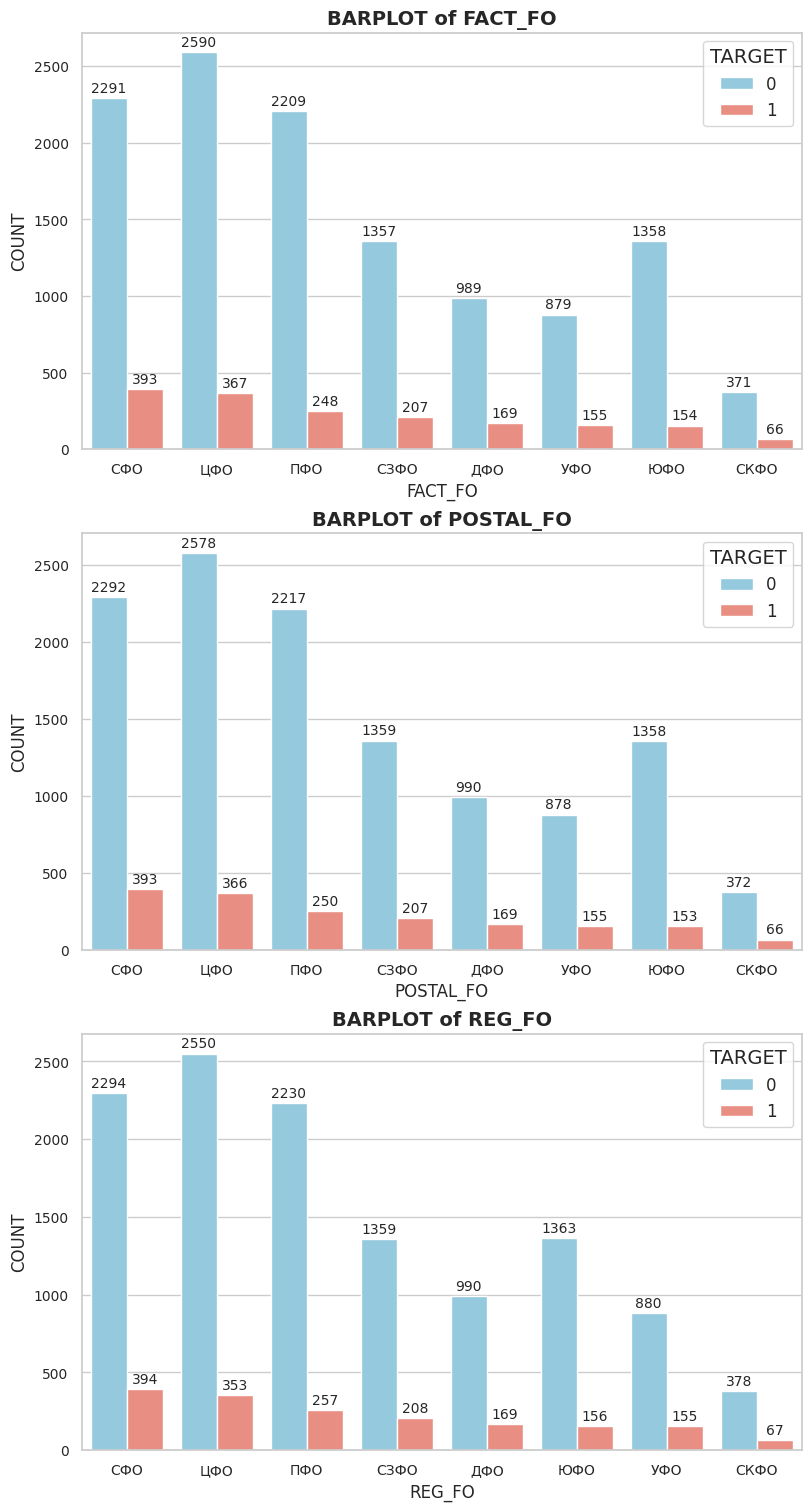

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
for col, ax in zip(['FACT_FO', 'POSTAL_FO', 'REG_FO'], axes):
  order = (
        data
        .groupby(col)['TARGET']
        .sum()
        .sort_values(ascending=False)
        .index
        .tolist()
    )
  sns.countplot(
        x=col,
        hue='TARGET',
        data=data,
        order=order,
        palette=['skyblue','salmon'],
        ax=ax
    )
  for container in ax.containers:
        ax.bar_label(container,
                     fmt='%.0f',
                     padding=2,
                     fontsize=10)
  legend = ax.legend(
        title='TARGET',
        loc='upper right',
        fontsize=12,        # размер шрифта меток
        title_fontsize=14   # размер шрифта заголовка
    )
  ax.set_xlabel(col)
  ax.set_ylabel('COUNT')
  ax.set_title(f'BARPLOT of {col}')
plt.show()

Нам нужно понять долю положительного ответа на маркетинг для каждого федерального округа и вклад каждого фед. округа в общее количество откликнувшихся на маркетинговую рекламу. Так мы поймем есть ли различия по регионам, в каком регионе чаще откликаются и какой регион вносит наибольший вклад на отклик.
Вцелом уже на данном этапе можно заметить связь между треми признаками, поэтому для дальнейшего анализа будем рассматривать только признак фактического проживания клиента.

In [ ]:
def stat_plot(col, data=data, rotation=0, title_font=14, label_font=12, figsize=(8, 12), labelbottom=True):
    fig, axes = plt.subplots(3, 1, figsize=figsize, constrained_layout=True)
    order = data[col].value_counts().index.tolist()

    # 1) Count + hue
    sns.countplot(
        data=data,
        x=col, hue='TARGET',
        order=order,
        palette=['skyblue', 'salmon'],
        ax=axes[0]
    )
    axes[0].set_title(f'Count of {col} by TARGET', fontsize=title_font)
    axes[0].set_xlabel(col, fontsize=label_font)
    axes[0].set_ylabel('Count', fontsize=label_font)
    axes[0].tick_params(axis='x', rotation=rotation, labelsize=8, labelbottom=labelbottom)
    axes[0].tick_params(axis='y', labelsize=8)
    for c in axes[0].containers:
        axes[0].bar_label(c, fmt='%d', padding=2, fontsize=8)

    axes[0].legend(
        title='TARGET',
        loc='upper right',
        fontsize=8,
        title_fontsize=10
    )

    # 2) Response rate
    df_rate = (
        data
        .groupby(col)['TARGET']
        .mean()
        .mul(100)
        .reset_index(name='response_rate')
    )
    sns.barplot(
        data=df_rate,
        x=col, y='response_rate',
        order=order,
        color='salmon',
        ax=axes[1]
    )
    axes[1].set_title(f'Response rate for {col}', fontsize=title_font)
    axes[1].set_xlabel(col, fontsize=label_font)
    axes[1].set_ylabel('Response rate, %', fontsize=label_font)
    axes[1].tick_params(axis='x', rotation=rotation, labelsize=8, labelbottom=labelbottom)
    axes[1].tick_params(axis='y', labelsize=8)
    for c in axes[1].containers:
        axes[1].bar_label(c, fmt='%.1f%%', padding=2, fontsize=8)

    # 3) Share of positives
    df_share = (
        data.loc[data['TARGET']==1, col]
        .value_counts(normalize=True)
        .mul(100)
        .reset_index(name='share')
    )
    df_share.columns = [col, 'share']
    sns.barplot(
        data=df_share,
        x=col, y='share',
        order=order,
        color='skyblue',
        ax=axes[2]
    )
    axes[2].set_title(f'Share of positives for {col}', fontsize=title_font)
    axes[2].set_xlabel(col, fontsize=label_font)
    axes[2].set_ylabel('Share of positives, %', fontsize=label_font)
    axes[2].tick_params(axis='x', rotation=rotation, labelsize=8)
    axes[2].tick_params(axis='y', labelsize=8)
    for c in axes[2].containers:
        axes[2].bar_label(c, fmt='%.1f%%', padding=2, fontsize=8)

    plt.show()


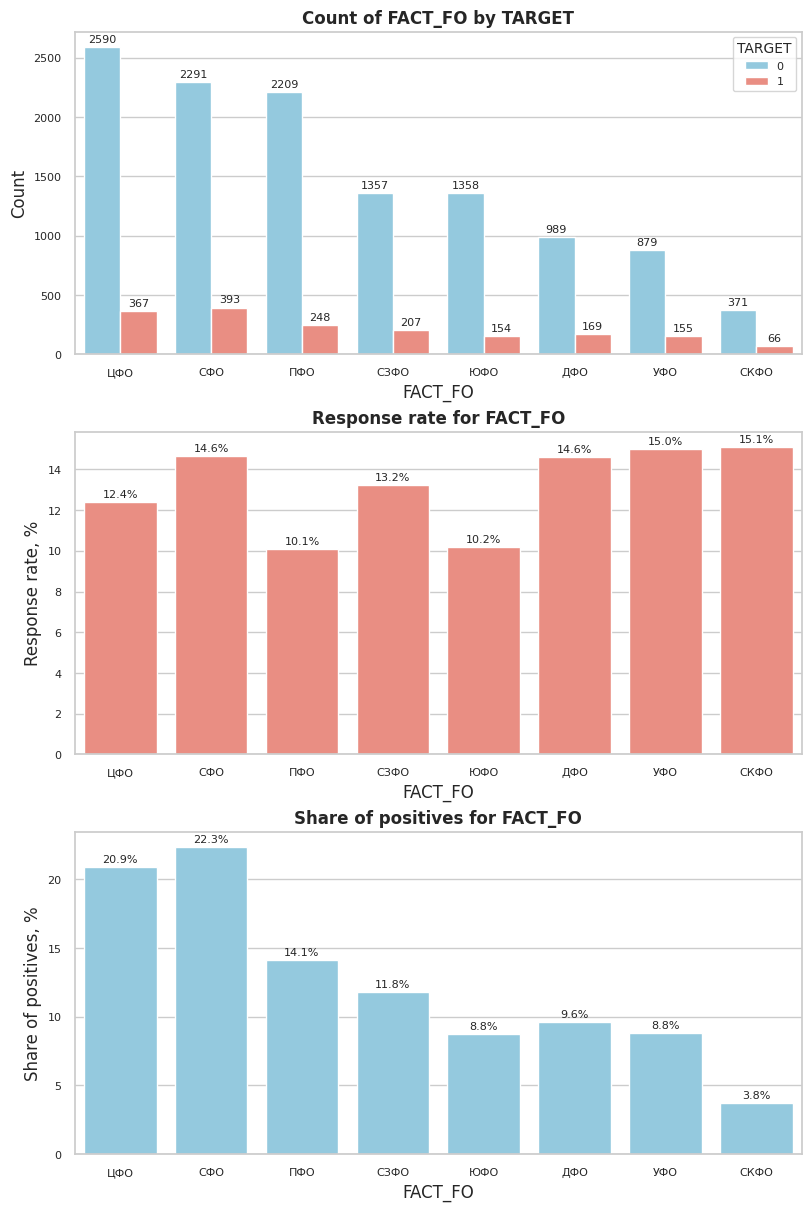

In [ ]:
stat_plot('FACT_FO', title_font = 12)

Объём: почти половину всех клиентов дают ЦФО и СФО, а СКФО и УФО — наименьшее представительство.

Вероятность отклика: выше всего в СКФО (15 %) и УФО (15 %), ниже всего в ПФО (~10 %).

Вклад в отклики: ЦФО+СФО дают ≈43 % всех позитивных ответов, даже несмотря на чуть более низкий rate.

Данный признак стоит оставить для дальнейшего обучения модели.

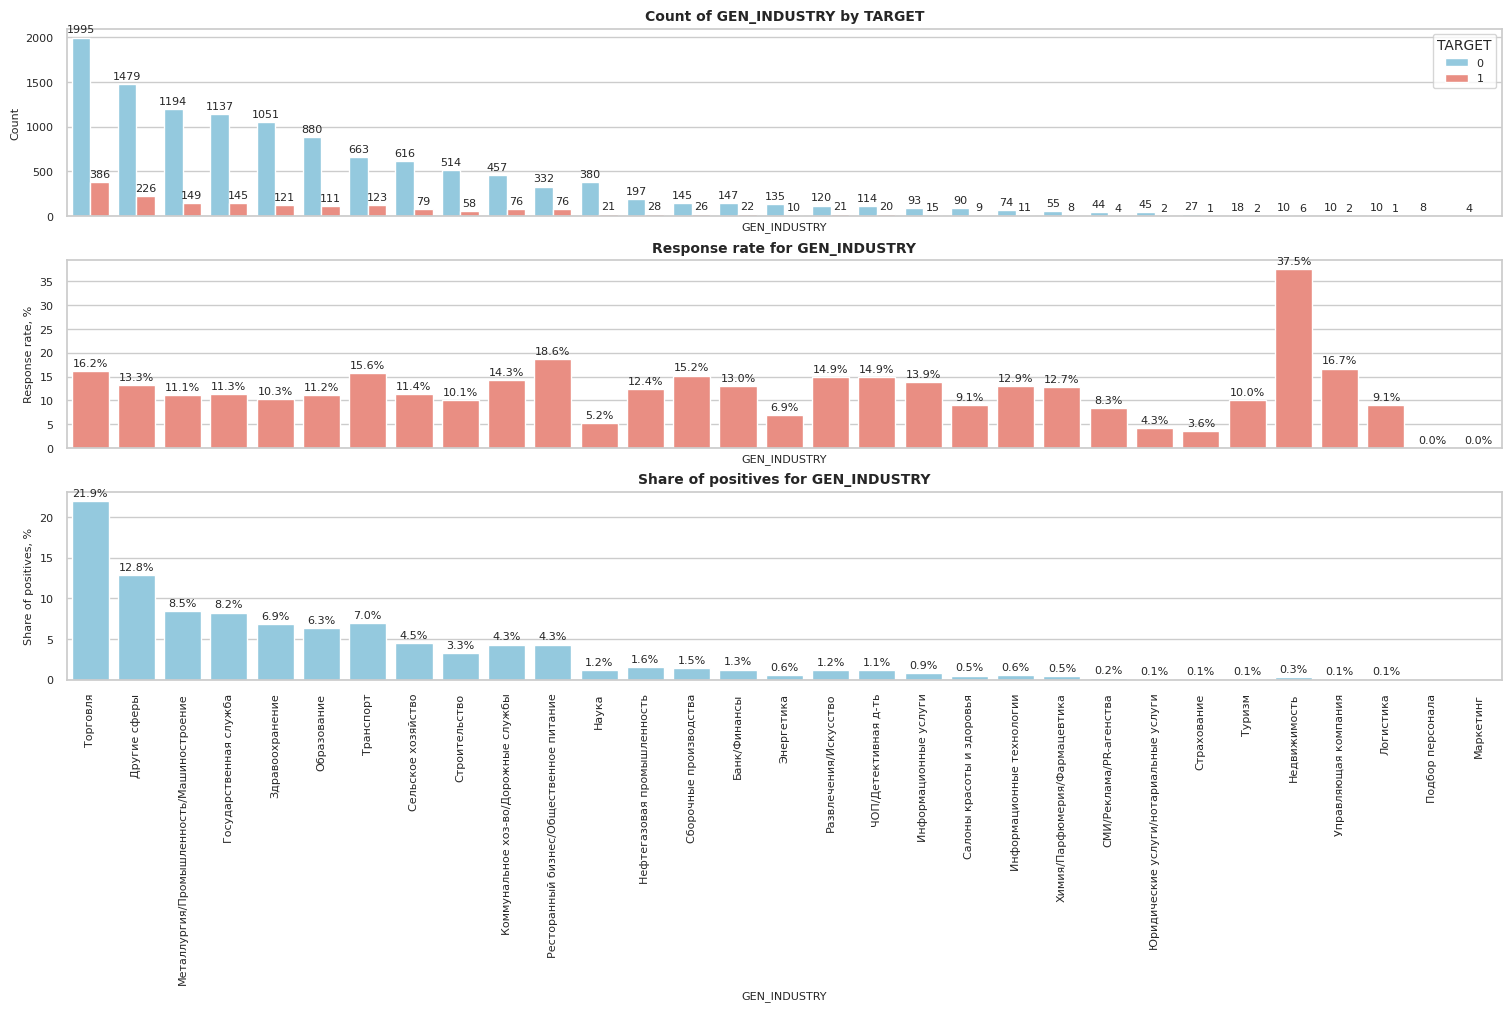

In [ ]:
stat_plot('GEN_INDUSTRY', title_font = 10, label_font = 8, rotation = 90, figsize = (15, 10), labelbottom=False)

Лидеры по объёму и вкладу: Торговля (22 % всех откликов) и «Другие сферы» (13 %).

Средний отклик (10–16 %) у крупных отраслей (Торговля ≈16 %, Машиностроение ≈13 %, Сельхоз ≈15 %).

Аномалия: Недвижимость (≈37 % response rate), но она даёт лишь 0.3 % всех откликов из-за малого числа клиентов.

Мелкие категории (< 50–100 клиентов), как Подбор персонала, Маркетинг, Логистика, вместе вносят < 1 % откликов — их лучше объединить в «Прочие».

In [ ]:
to_group = ['Подбор персонала', 'Маркетинг', 'Логистика']

data.loc[
    data['GEN_INDUSTRY'].isin(to_group),
    'GEN_INDUSTRY'
] = 'Прочие'

In [ ]:
data.describe(include = 'object')

,EDUCATION,MARITAL_STATUS,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,FAMILY_INCOME,FACT_FO,POSTAL_FO,REG_FO
count,13803,13803,13803,13803,13803,13803,13803,13803,13803,13803,13803,13803
unique,7,5,81,81,80,29,12,10,5,8,8,8
top,Среднее специальное,Состою в браке,Кемеровская область,Кемеровская область,Кемеровская область,Торговля,Специалист,Участие в основ. деятельности,от 10000 до 20000 руб.,ЦФО,ЦФО,ЦФО
freq,5916,8592,608,608,608,2381,6978,11405,6316,2957,2944,2903


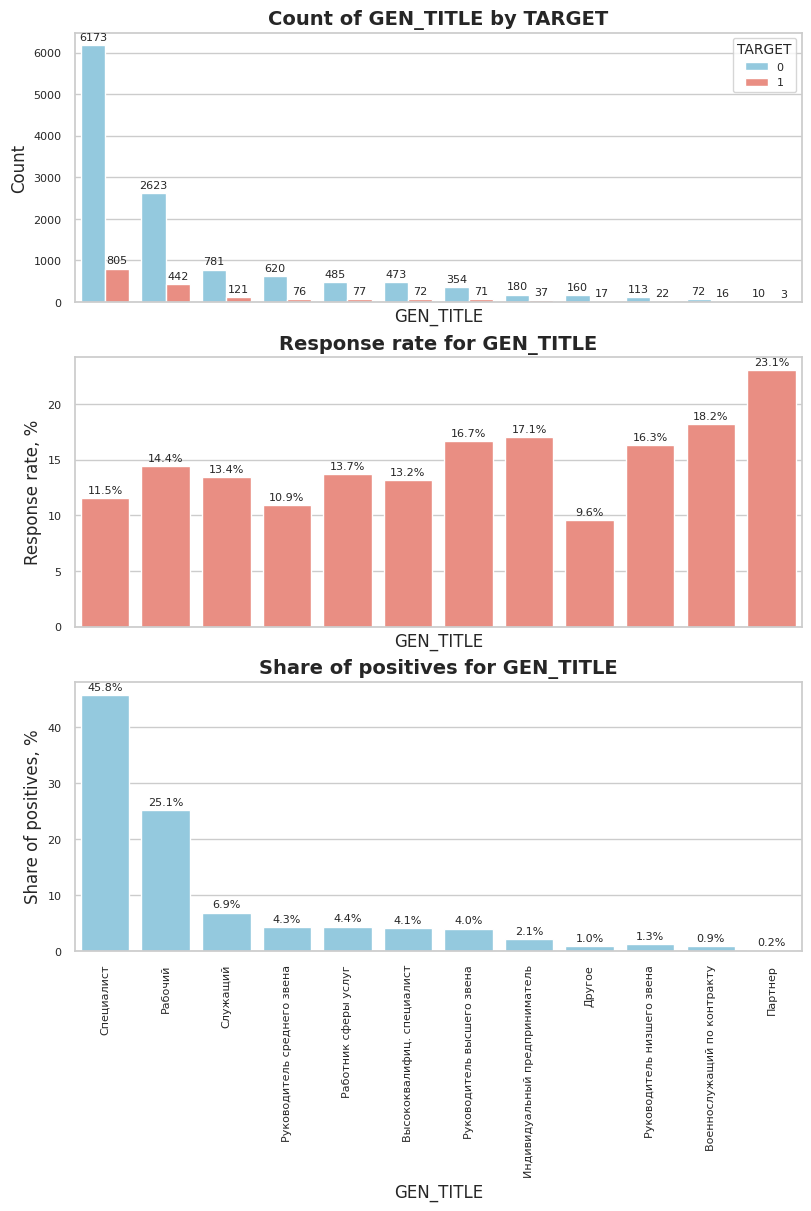

In [ ]:
stat_plot('GEN_TITLE', rotation = 90, labelbottom=False)

Данные распределны неравноверно. Почти 50% вклада вносят специалисты, остальные 50 распределены между другими работниками.

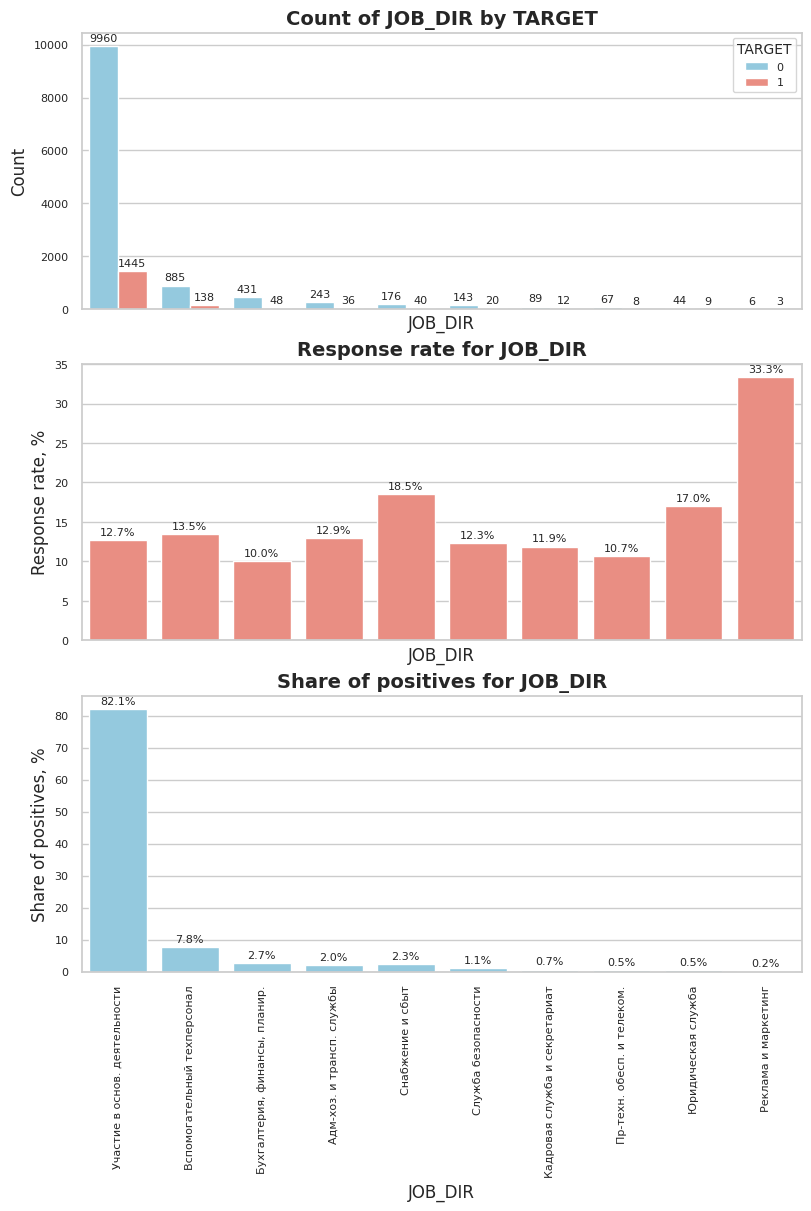

In [ ]:
stat_plot('JOB_DIR', rotation=90, labelbottom=False)

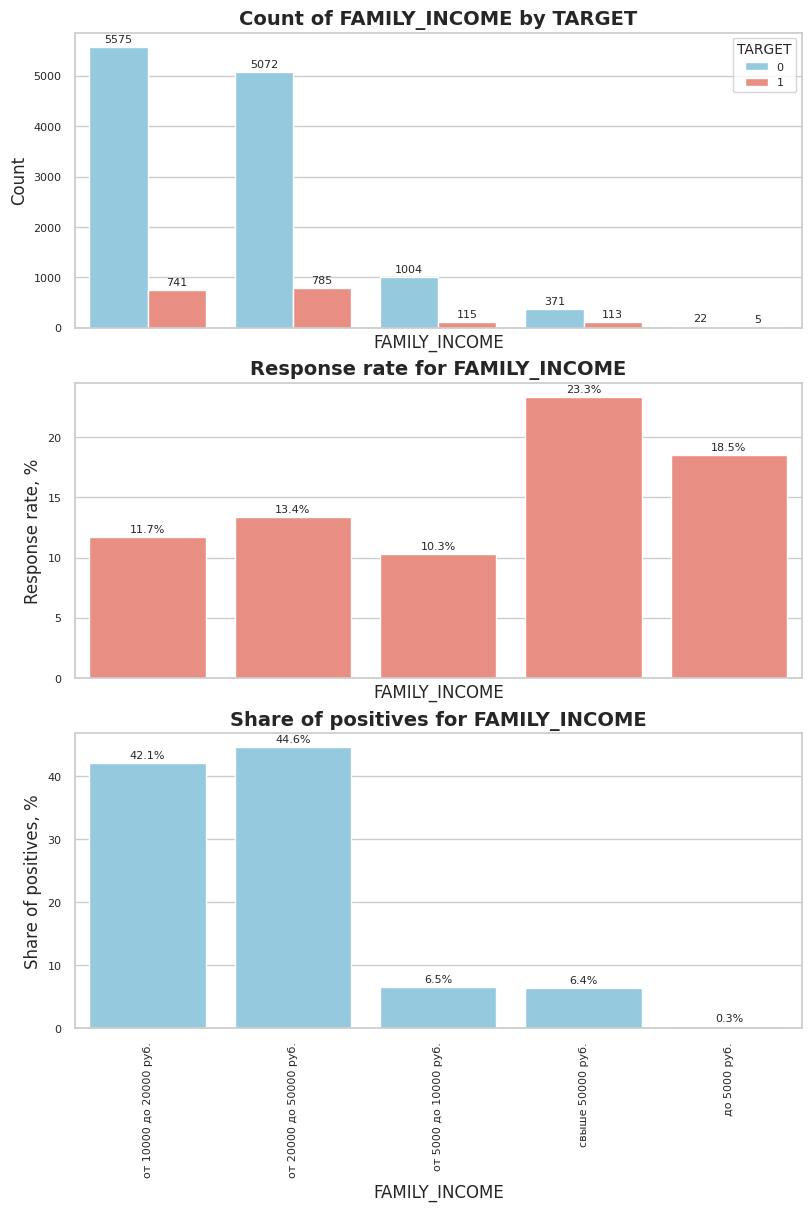

In [ ]:
stat_plot('FAMILY_INCOME', rotation=90, labelbottom=False)

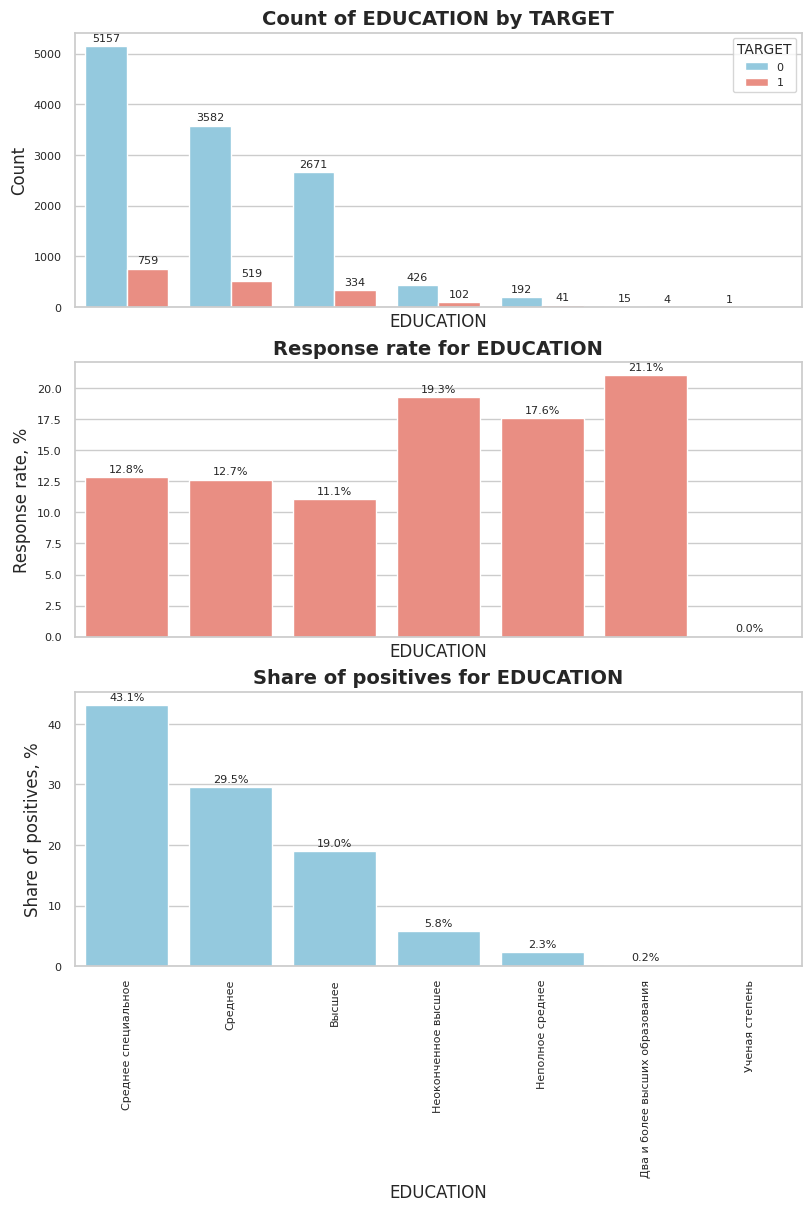

In [ ]:
stat_plot('EDUCATION', rotation=90, labelbottom=False)

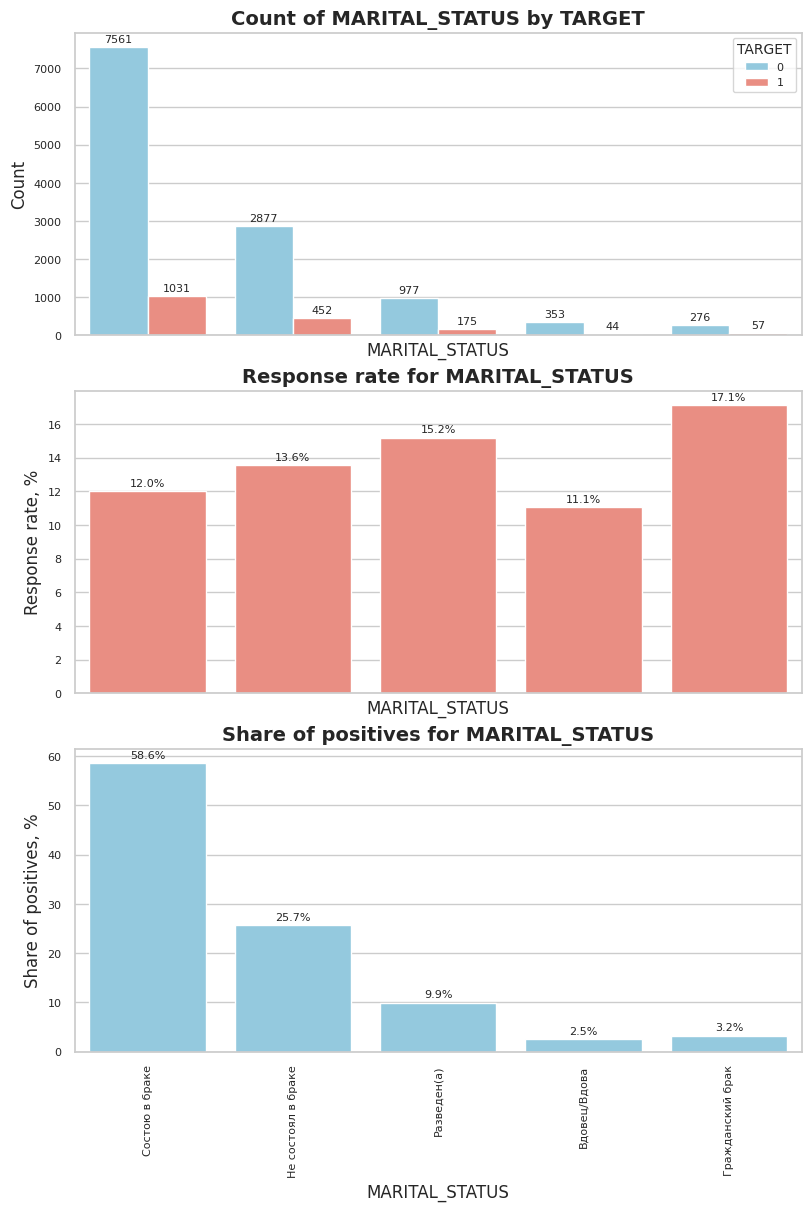

In [ ]:
stat_plot('MARITAL_STATUS', rotation=90, labelbottom=False)

## Анализ зависимости между признаками и таргетом

In [ ]:
!pip install association-metrics

  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3928 sha256=a9a583d4310f3fd5dfd13172326233a3452d68d8d5767716e8103a553433be5b
  Stored in directory: /root/.cache/pip/wheels/18/bd/17/1d2797e86c263937dab5965950332519bd9dd8bddd746c88bc
Successfully built association-metrics


In [ ]:
import association_metrics as am

In [ ]:
XC = data.apply(
        lambda x: x.astype("category") if x.dtype == "object" else x)
cramersv = am.CramersV(XC)

cramersv.fit()

,EDUCATION,MARITAL_STATUS,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,FAMILY_INCOME,FACT_FO,POSTAL_FO,REG_FO
EDUCATION,1.000000,0.063618,0.101635,0.101447,0.102344,0.125745,0.146206,0.091020,0.110278,0.047032,0.046954,0.047128
MARITAL_STATUS,0.063618,1.000000,0.102694,0.103009,0.102926,0.074114,0.049038,0.032786,0.130964,0.046755,0.047014,0.047453
REG_ADDRESS_PROVINCE,0.101635,0.102694,1.000000,0.975266,0.988188,0.103244,0.108003,0.090040,0.255334,0.994541,0.995723,1.000000
FACT_ADDRESS_PROVINCE,0.101447,0.103009,0.975266,1.000000,0.992649,0.103397,0.108244,0.094678,0.265156,1.000000,0.998540,0.994567
POSTAL_ADDRESS_PROVINCE,0.102344,0.102926,0.988188,0.992649,1.000000,0.103190,0.106979,0.087238,0.262681,0.998439,1.000000,0.995563
GEN_INDUSTRY,0.125745,0.074114,0.103244,0.103397,0.103190,1.000000,0.134207,0.129121,0.113978,0.095130,0.095034,0.094664
GEN_TITLE,0.146206,0.049038,0.108003,0.108244,0.106979,0.134207,1.000000,0.097069,0.117418,0.060668,0.060438,0.060218
JOB_DIR,0.091020,0.032786,0.090040,0.094678,0.087238,0.129121,0.097069,1.000000,0.068416,0.027642,0.027967,0.027536
FAMILY_INCOME,0.110278,0.130964,0.255334,0.265156,0.262681,0.113978,0.117418,0.068416,1.000000,0.139903,0.139864,0.138968
FACT_FO,0.047032,0.046755,0.994541,1.000000,0.998439,0.095130,0.060668,0.027642,0.139903,1.000000,0.998424,0.994204


Наибольшую зависимость можно наблюдать между признаками, связанными с регионами проживания/регистрации, поэтому имеет смысл оставить 1 такой признак, а остальные убрать. Мы оставим признак FACT_FO, который отображает фактический федеральный округ, где проживает клиент.

In [ ]:
X = data.drop(columns = ['TARGET', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'REG_ADDRESS_PROVINCE', 'POSTAL_FO', 'REG_FO'])
y = data['TARGET']

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
cat_features = X.columns[X.dtypes == 'object']

In [ ]:
cat_features

Index(['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR',
       'FAMILY_INCOME', 'FACT_FO'],
      dtype='object')

In [ ]:
results = []

for cat in cat_features:
  cont = pd.crosstab(X[cat], y)
  chi2, p, dof, expected = chi2_contingency(cont)
  results.append(
      {'feature': cat,
      'chi2':     chi2,
      'p_value':  p,
      'dof':      dof,
      'n_rows':   cont.values.sum()}
  )

res_df = pd.DataFrame(results).sort_values('p_value').reset_index(drop=True)

In [ ]:
res_df

,feature,chi2,p_value,dof,n_rows
0,FAMILY_INCOME,63.971186,4.237968e-13,4,13803
1,GEN_INDUSTRY,109.340103,1.473776e-11,28,13803
2,FACT_FO,44.200740,1.954102e-07,7,13803
3,EDUCATION,34.023005,6.658935e-06,6,13803
4,GEN_TITLE,36.230710,1.549158e-04,11,13803
5,MARITAL_STATUS,19.278347,6.928960e-04,4,13803
6,JOB_DIR,14.924467,9.303173e-02,9,13803


In [ ]:
for feature in res_df['feature']:
  total_res.append({
      'feature': feature,
      'k_value': res_df.loc[res_df['feature'] == feature]['p_value'].values[0]
  })

Все значения p_value < 0.05, значит признаки статистически значимы для таргета. Опрелелим силу зависимости между признаками и таргетом с помощью метода Крамера

In [ ]:
def cramers_v(x, y):
    cont = pd.crosstab(x, y)
    chi2 = chi2_contingency(cont, correction=False)[0]
    n = cont.values.sum()
    phi2 = chi2 / n
    r, k = cont.shape
    return np.sqrt(phi2 / min(r-1, k-1))

In [ ]:
results = []
for col in cat_features:
    v = cramers_v(data[col], data['TARGET'])
    results.append({'feature': col, 'cramers_v': v})

res_df = pd.DataFrame(results).sort_values('cramers_v', ascending=False).reset_index(drop=True)

In [ ]:
for feature in res_df['feature']:
  total_res.append({
      'feature': feature,
      'k_value': res_df.loc[res_df['feature'] == feature]['cramers_v'].values[0]
  })

In [ ]:
total_res

[{'feature': 'WORK_TIME', 'k_value': np.float64(2.510441040296869e-22)},
 {'feature': 'AGE', 'k_value': np.float64(1.41877554036348e-17)},
 {'feature': 'PERSONAL_INCOME', 'k_value': np.float64(2.0928616782458958e-21)},
 {'feature': 'FAMILY_INCOME', 'k_value': np.float64(4.237968103688477e-13)},
 {'feature': 'GEN_INDUSTRY', 'k_value': np.float64(1.4737755290825907e-11)},
 {'feature': 'FACT_FO', 'k_value': np.float64(1.9541017304817414e-07)},
 {'feature': 'EDUCATION', 'k_value': np.float64(6.658935063840168e-06)},
 {'feature': 'GEN_TITLE', 'k_value': np.float64(0.00015491584345250737)},
 {'feature': 'MARITAL_STATUS', 'k_value': np.float64(0.0006928960425084343)},
 {'feature': 'JOB_DIR', 'k_value': np.float64(0.0930317347895989)},
 {'feature': 'GEN_INDUSTRY', 'k_value': np.float64(0.08900266168291973)},
 {'feature': 'FAMILY_INCOME', 'k_value': np.float64(0.06807779149289131)},
 {'feature': 'FACT_FO', 'k_value': np.float64(0.0565884795474232)},
 {'feature': 'GEN_TITLE', 'k_value': np.float

По χ²-тесту все рассмотренные категориальные признаки (GEN_INDUSTRY, FAMILY_INCOME, FACT_FO и др.) показали статистически значимые различия распределения TARGET=0/1 (p<0,05), т. е. их уровни не равномерно распределены между откликнувшимися и не откликнувшимися клиентами.

Однако по коэффициенту Cramér’s V все они лежат ниже 0,1, что указывает на слабую силу этой связи.

Самый высокий V (0,089) дал признак GEN_INDUSTRY, далее идут FAMILY_INCOME (0,068) и FACT_FO (0,056).

# Числовые категориальные признаки

In [ ]:
X.describe()

,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,WORK_TIME,PERSONAL_INCOME
count,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000,13803.000000
mean,38.706078,0.639209,1.085778,0.697457,0.999348,0.047961,0.308918,0.123886,82.163660,14409.664360
std,10.615627,0.480247,0.955860,0.822387,0.025528,0.213691,0.462064,0.329683,88.677653,9082.416033
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.000000
25%,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.000000,9000.000000
50%,38.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,48.000000,12000.000000
75%,47.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,108.000000,17000.000000
max,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,474.000000,250000.000000


In [ ]:
cat_num_columns = ['GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'FL_PRESENCE_FL', 'OWN_AUTO']

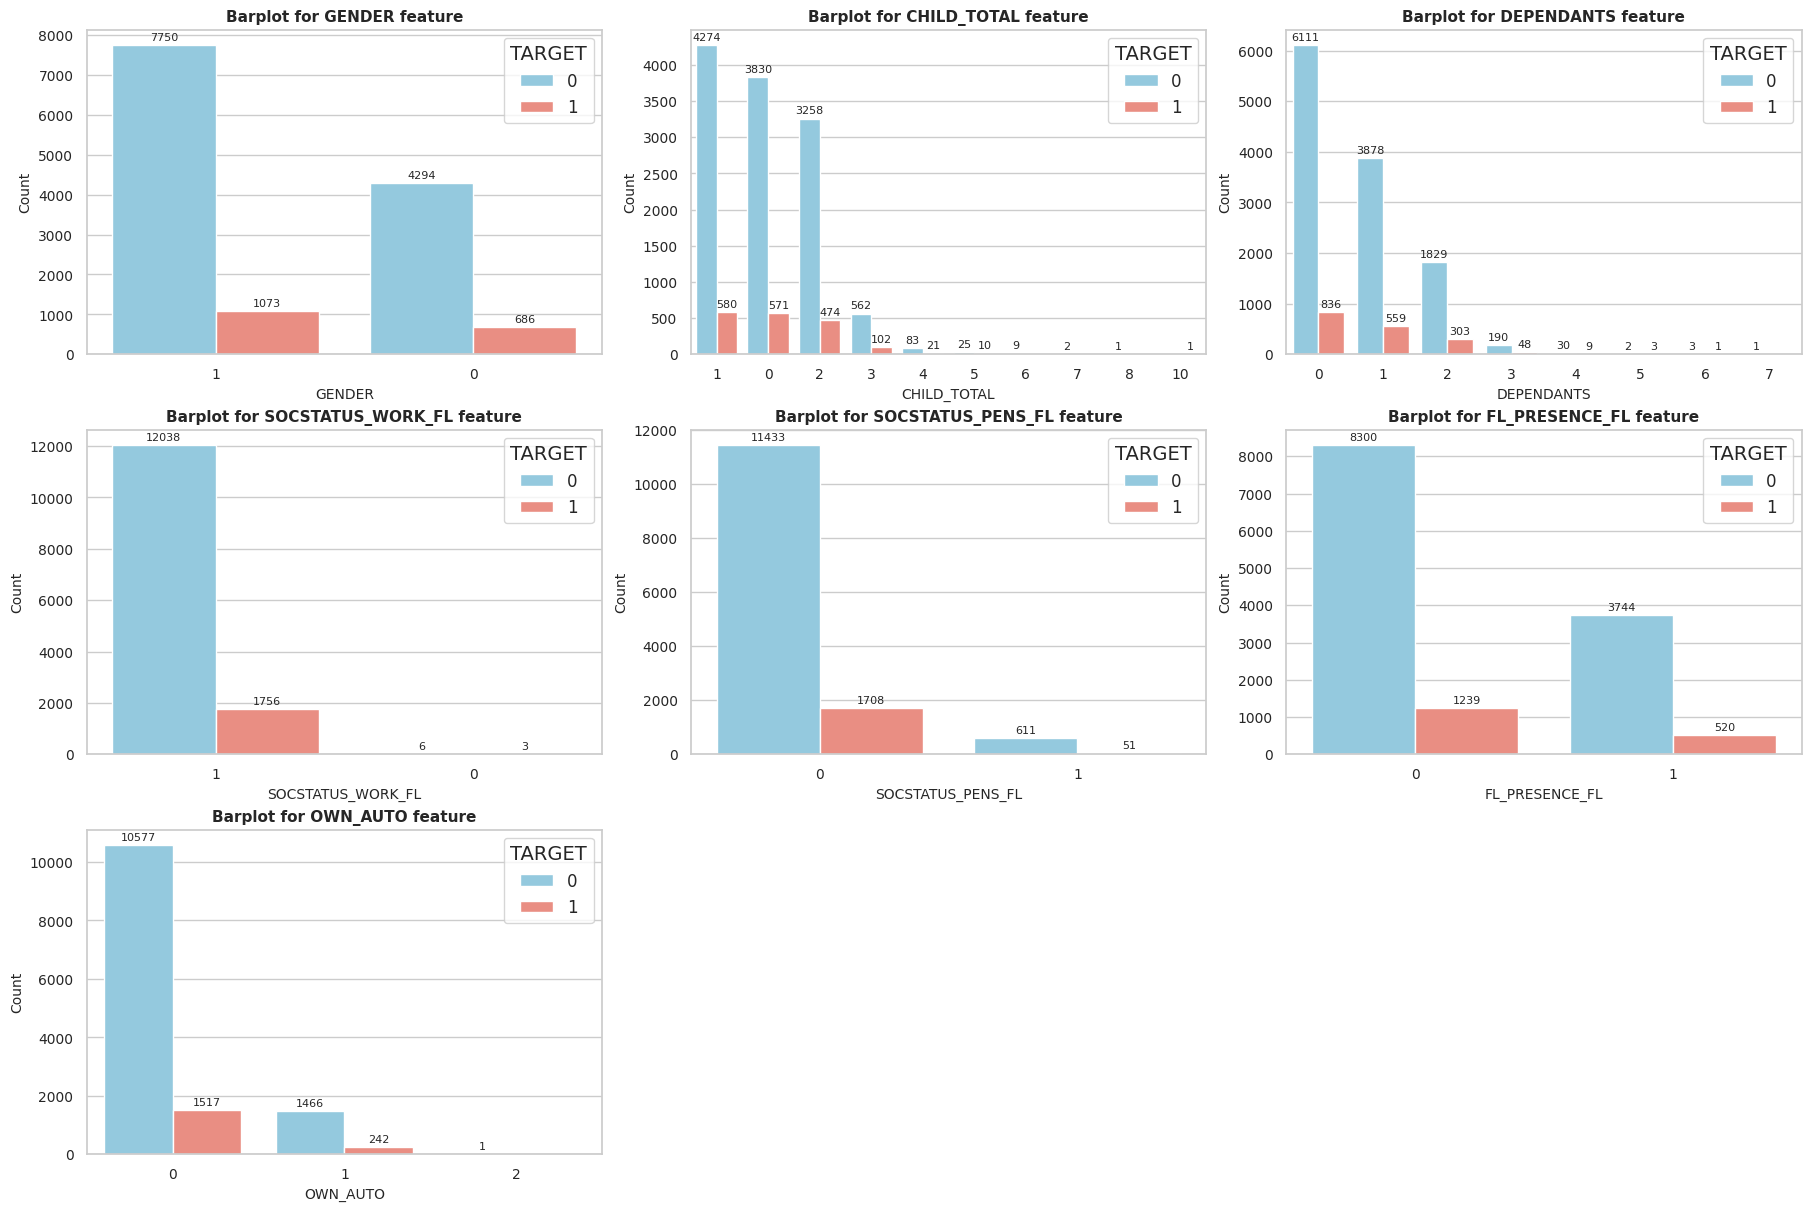

In [ ]:
n = len(cat_num_columns)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols,
                         figsize=(18, 12),
                         constrained_layout=True)

axes = axes.flatten()

for col, ax in zip(cat_num_columns, axes):
  order = X[col].value_counts().index.tolist()
  sns.countplot(x=col, hue=y, data=X, ax=ax, order=order,palette=['skyblue', 'salmon'])
  ax.set_title(f'Barplot for {col} feature', fontsize = 11)
  ax.set_ylabel('Count', fontsize=10)
  ax.set_xlabel(col, fontsize=10)
  legend = ax.legend(
        title='TARGET',
        loc='upper right',
        fontsize=12,
        title_fontsize=14
    )
  for container in ax.containers:
        ax.bar_label(container,
                     fmt='%.0f',
                     padding=2,
                     fontsize=8,
                     )

for ax in axes[n:]:
    ax.set_visible(False)
plt.show()


In [ ]:
results = []

for cat in cat_num_columns:
  cont = pd.crosstab(X[cat], y)
  chi2, p, dof, expected = chi2_contingency(cont)
  results.append(
      {'feature': cat,
      'chi2':     chi2,
      'p_value':  p,
      'dof':      dof,
      'n_rows':   cont.values.sum()}
  )

res_df = pd.DataFrame(results).sort_values('p_value').reset_index(drop=True)

In [ ]:
res_df

,feature,chi2,p_value,dof,n_rows
0,DEPENDANTS,33.635447,0.000020,7,13803
1,SOCSTATUS_PENS_FL,15.410023,0.000087,1,13803
2,CHILD_TOTAL,28.740160,0.000717,9,13803
3,GENDER,7.310286,0.006856,1,13803
4,OWN_AUTO,3.701097,0.157151,2,13803
5,SOCSTATUS_WORK_FL,1.830607,0.176056,1,13803
6,FL_PRESENCE_FL,1.598660,0.206093,1,13803


Для признаков OWN_AUTO, SOCSTATUS_WORK_FL, FL_PRESENCE_FL нет основания считать, что их распределение между откликнувшимися и нет клиентов отличается статистически.
При построении модели мы будем тестировать будут ли улучшаться результаты, если убрать эти признаки.

In [ ]:
results = []
for col in cat_num_columns:
    v = cramers_v(data[col], data['TARGET'])
    results.append({'feature': col, 'cramers_v': v})

res_df = pd.DataFrame(results).sort_values('cramers_v', ascending=False).reset_index(drop=True)

In [ ]:
res_df

,feature,cramers_v
0,DEPENDANTS,0.049364
1,CHILD_TOTAL,0.045631
2,SOCSTATUS_PENS_FL,0.033921
3,GENDER,0.023240
4,OWN_AUTO,0.016375
5,SOCSTATUS_WORK_FL,0.015772
6,FL_PRESENCE_FL,0.010997


In [ ]:
for feature in res_df['feature']:
  total_res.append({
      'feature': feature,
      'k_value': res_df.loc[res_df['feature'] == feature]['cramers_v'].values[0]
  })

Наблюдается довольно слабая связь между признаками и таргетом.

# Конечные таблицы и данные

In [ ]:
final_data = X.join(y).copy()
final_data.to_csv('final_data.csv')

In [ ]:
total_res_df = pd.DataFrame(total_res)

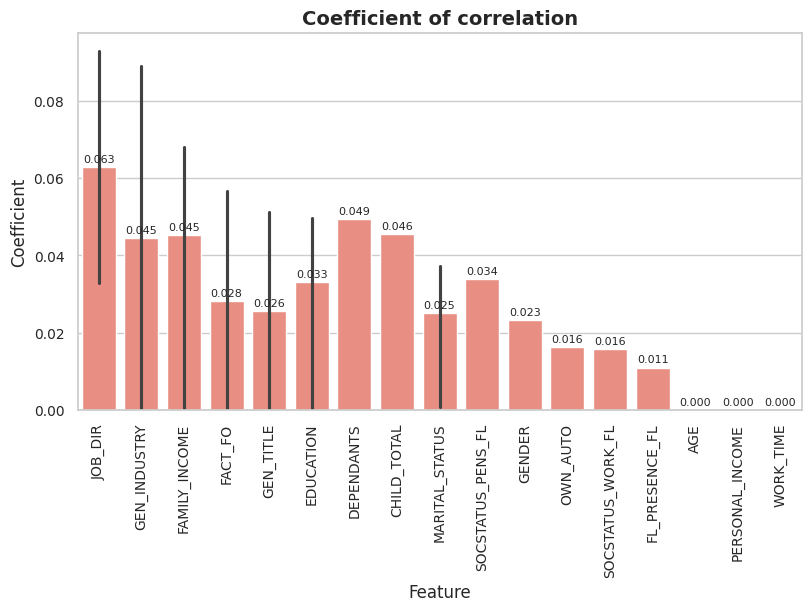

In [ ]:
plt.figure(figsize = (8, 6))
res_df_sorted = total_res_df.sort_values('k_value', ascending=False).reset_index(drop=True)
ax = sns.barplot(x='feature', y='k_value', data=res_df_sorted, color = 'salmon')
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=2, fontsize=8)
plt.title('Coefficient of correlation')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation = 90)
plt.show()

# Обучение

In [ ]:
!pip install category_encoders -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline

from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder

In [ ]:
X['WORK_TIME_log'] = np.log1p(X['WORK_TIME'])
X['PERSONAL_INCOME_log'] = np.log1p(X['PERSONAL_INCOME'])
X.drop(['WORK_TIME','PERSONAL_INCOME'], axis=1, inplace=True)

In [ ]:
object_columns = X.columns[X.dtypes == 'object']

In [ ]:
X.head()

,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,FAMILY_INCOME,FACT_FO,WORK_TIME_log,PERSONAL_INCOME_log
0,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,Торговля,Рабочий,Вспомогательный техперсонал,от 10000 до 20000 руб.,ПФО,2.944439,8.517393
2,32,1,Среднее,Состою в браке,3,3,1,0,0,0,Торговля,Рабочий,Участие в основ. деятельности,от 10000 до 20000 руб.,СКФО,4.584967,9.392745
3,52,1,Неполное среднее,Состою в браке,4,0,1,0,0,0,Информационные технологии,Специалист,Участие в основ. деятельности,от 10000 до 20000 руб.,СФО,4.442651,9.105091
4,39,1,Высшее,Состою в браке,1,1,1,0,1,0,Образование,Руководитель среднего звена,Участие в основ. деятельности,от 20000 до 50000 руб.,ЮФО,5.129899,10.126671
5,30,0,Среднее,Состою в браке,0,0,1,0,0,0,Государственная служба,Специалист,Участие в основ. деятельности,от 10000 до 20000 руб.,СКФО,4.624973,9.392745


In [ ]:
X.columns

Index(['AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL',
       'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'FL_PRESENCE_FL', 'OWN_AUTO', 'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR',
       'FAMILY_INCOME', 'FACT_FO', 'WORK_TIME_log', 'PERSONAL_INCOME_log'],
      dtype='object')

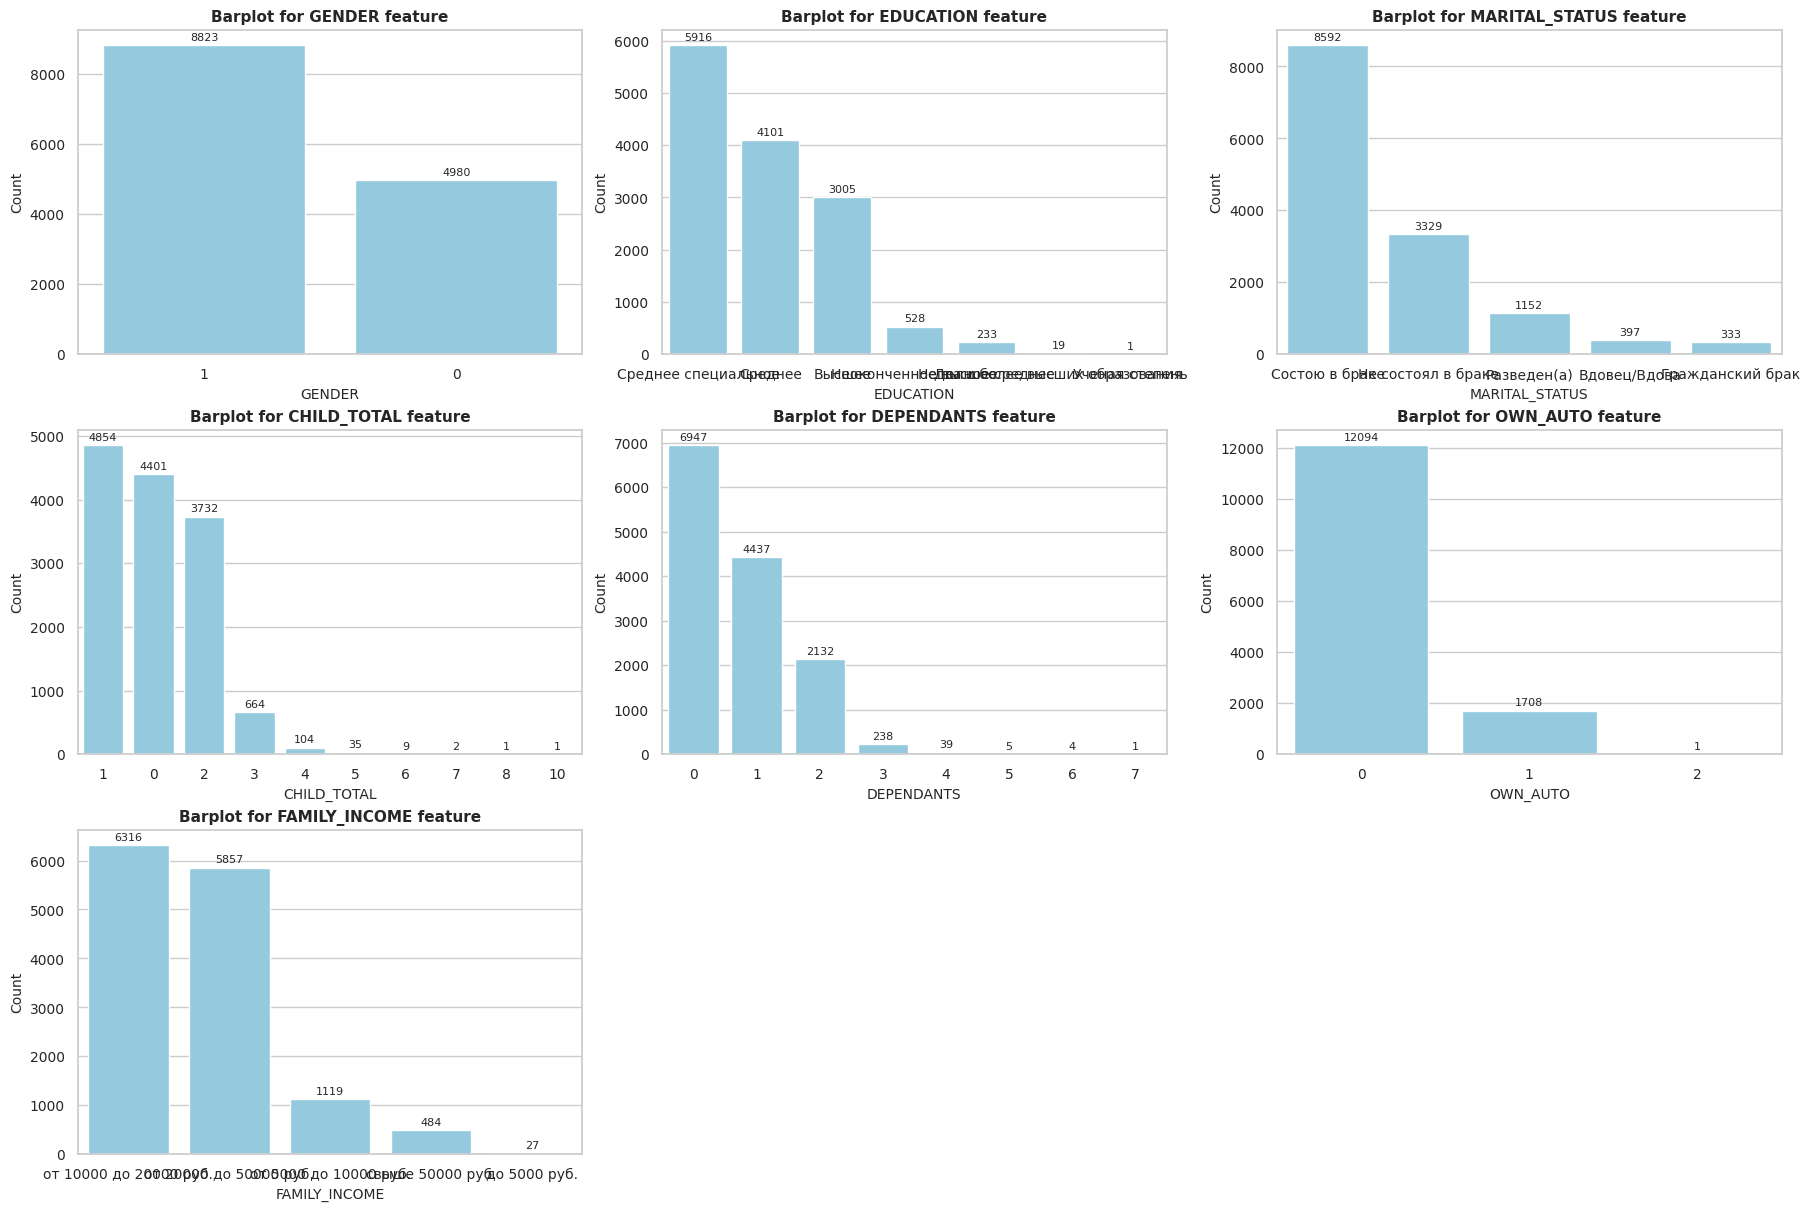

In [ ]:
cat_num_columns = ['GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS', 'OWN_AUTO', 'FAMILY_INCOME']
n = len(cat_num_columns)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols,
                         figsize=(18, 12),
                         constrained_layout=True)

axes = axes.flatten()

for col, ax in zip(cat_num_columns, axes):
  order = X[col].value_counts().index.tolist()
  sns.countplot(x=col, data=X, ax=ax, order=order)
  ax.set_title(f'Barplot for {col} feature', fontsize = 11)
  ax.set_ylabel('Count', fontsize=10)
  ax.set_xlabel(col, fontsize=10)

  for container in ax.containers:
        ax.bar_label(container,
                     fmt='%.0f',
                     padding=2,
                     fontsize=8,
                     )

  plt.xticks(rotation = 90)

for ax in axes[n:]:
    ax.set_visible(False)

plt.show()


In [ ]:
X['EDUCATION'].value_counts()

,count
EDUCATION,
Среднее специальное,5916
Среднее,4101
Высшее,3005
Неоконченное высшее,528
Неполное среднее,233
Два и более высших образования,19
Ученая степень,1


In [ ]:
X['MARITAL_STATUS'].value_counts()

,count
MARITAL_STATUS,
Состою в браке,8592
Не состоял в браке,3329
Разведен(а),1152
Вдовец/Вдова,397
Гражданский брак,333


In [ ]:
X['FAMILY_INCOME'].value_counts()

,count
FAMILY_INCOME,
от 10000 до 20000 руб.,6316
от 20000 до 50000 руб.,5857
от 5000 до 10000 руб.,1119
свыше 50000 руб.,484
до 5000 руб.,27


In [ ]:
X['CHILD_TOTAL'].value_counts()

,count
CHILD_TOTAL,
1,4854
0,4401
2,3732
3,664
4,104
5,35
6,9
7,2
8,1


In [ ]:
X['DEPENDANTS'].value_counts()

,count
DEPENDANTS,
0,6947
1,4437
2,2132
3,238
4,39
5,5
6,4
7,1


In [ ]:
X['DEPENDANTS'] = ['3 and more' if x >= 3 else x for x in X['DEPENDANTS']]
X['CHILD_TOTAL'] = ['4 and more' if x >= 4 else x for x in X['CHILD_TOTAL']]

In [ ]:
X['OWN_AUTO'] = [1 if x >= 1 else 0 for x in X['OWN_AUTO']]

In [ ]:
X['FL_PRESENCE_FL'].value_counts()

,count
FL_PRESENCE_FL,
0,9539
1,4264


In [ ]:
X.columns

Index(['AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL',
       'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'FL_PRESENCE_FL', 'OWN_AUTO', 'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR',
       'FAMILY_INCOME', 'FACT_FO', 'WORK_TIME_log', 'PERSONAL_INCOME_log'],
      dtype='object')

In [ ]:
education_order = {
    "Неполное среднее": 0,
    "Среднее": 1,
    "Среднее специальное": 2,
    "Неоконченное высшее": 3,
    "Высшее": 4,
    "Два и более высших образования": 5,
    "Ученая степень": 6
}

X["EDUCATION_encoded"] = X["EDUCATION"].map(education_order)
X = X.drop('EDUCATION', axis = 1)

In [ ]:
X['FAMILY_INCOME'].unique()

array(['от 10000 до 20000 руб.', 'от 20000 до 50000 руб.',
       'свыше 50000 руб.', 'от 5000 до 10000 руб.', 'до 5000 руб.'],
      dtype=object)

In [ ]:
income_order = {
    "до 5000 руб.": 0,
    "от 5000 до 10000 руб.": 1,
    "от 10000 до 20000 руб.": 2,
    "от 20000 до 50000 руб.": 3,
    "свыше 50000 руб.": 4,
}

X["FAMILY_INCOME_encoded"] = X["FAMILY_INCOME"].map(income_order)
X = X.drop('FAMILY_INCOME', axis = 1)

In [ ]:
X['FAMILY_INCOME_encoded'].value_counts()

,count
FAMILY_INCOME_encoded,
2,6316
3,5857
1,1119
4,484
0,27


In [ ]:
X.describe(include = 'object')

,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,FACT_FO
count,13803,13803,13803,13803,13803,13803,13803
unique,5,5,4,29,12,10,8
top,Состою в браке,1,0,Торговля,Специалист,Участие в основ. деятельности,ЦФО
freq,8592,4854,6947,2381,6978,11405,2957
